In [1]:
### Modules ### 
import pandas as pd
import numpy as np

# algumas bibliotecas para data-viz:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


### GCP Modules ### 
from google.cloud import storage
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/gabrielgomes/Downloads/awaricripto-5cfe64a9c26d.json"
import gcsfs
fs = gcsfs.GCSFileSystem(project='awaricripto')

### Function defined in other file ###
import ipynb.fs  
from .defs.TSexp import read_csv, logScaler, standardScaler, mmScaler, rbstScaler

### Read main50 into the notebook | Define random5

In [2]:
with fs.open('main50/main50.csv') as f:
    main50 = pd.read_csv(f, index_col = 'Unnamed: 0')

### Define features 

In [9]:
linear_features = ['twitter_followers','reddit_subs','github_subs','forks',
                   'stars','total_issues','closed_issues',
                    'pull_rqst_merged', 'pull_request_contributors',
                    'usd_cp']

behav_features = [ 'reddit_avg_posts_48h',
                   'reddit_avg_comments_48h',
                   'usd_tv','usd_cp']

selected_features = ['reddit_avg_posts_48h',
                     'usd_cp']

all_features = (linear_features + behav_features)
all_features.remove('usd_cp')

### Create dataframe for statistical analysis

In [28]:
def log_plot(id, days):
    df = read_csv(id)
    df_log = standardScaler(id, selected_features, days)
    df_log = df_log[0]
    
    df_log.plot(figsize=(30,10), title = id)

/Users/gabrielgomes/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


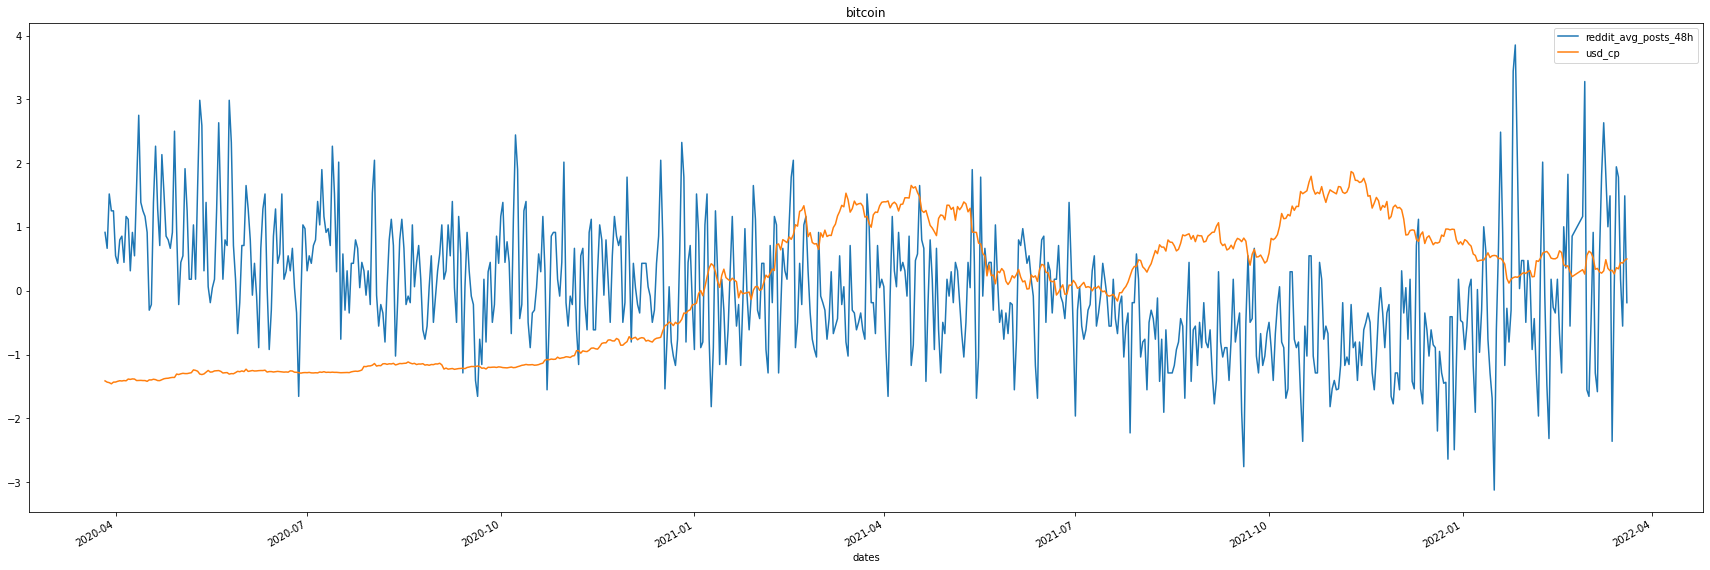

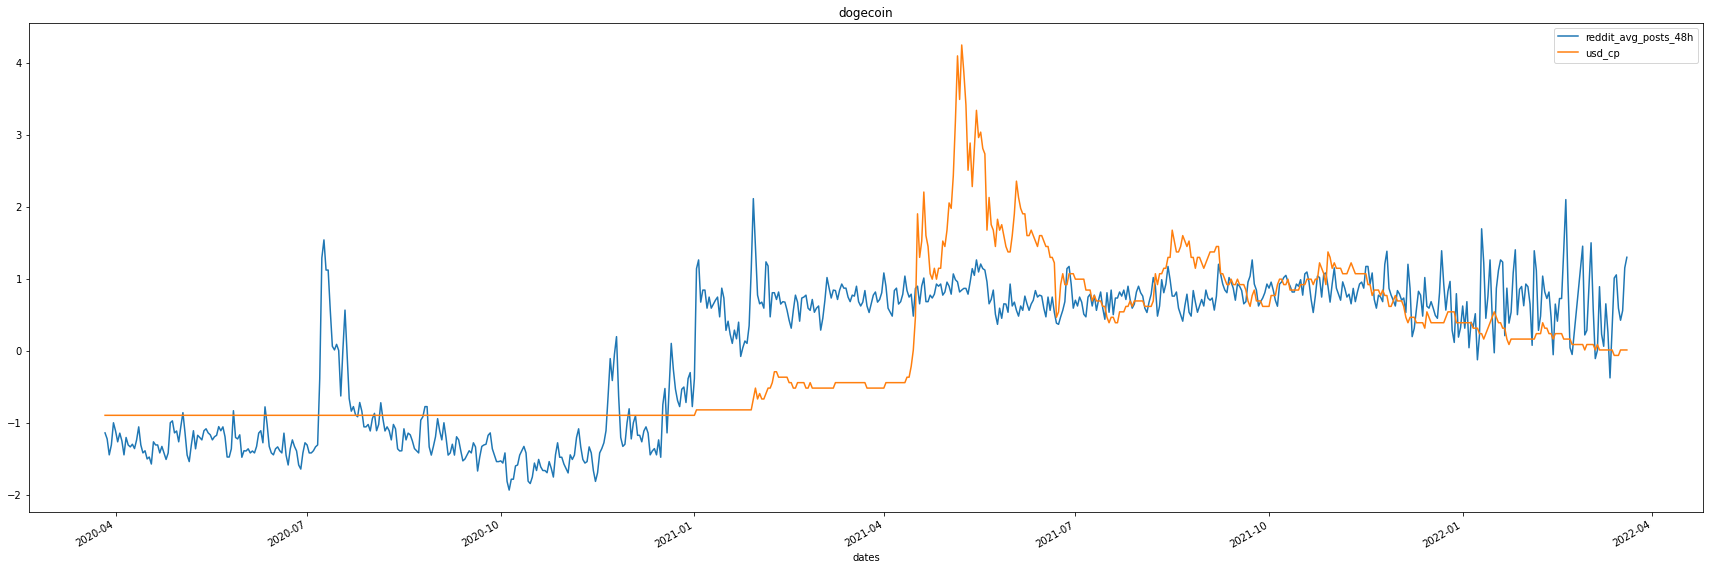

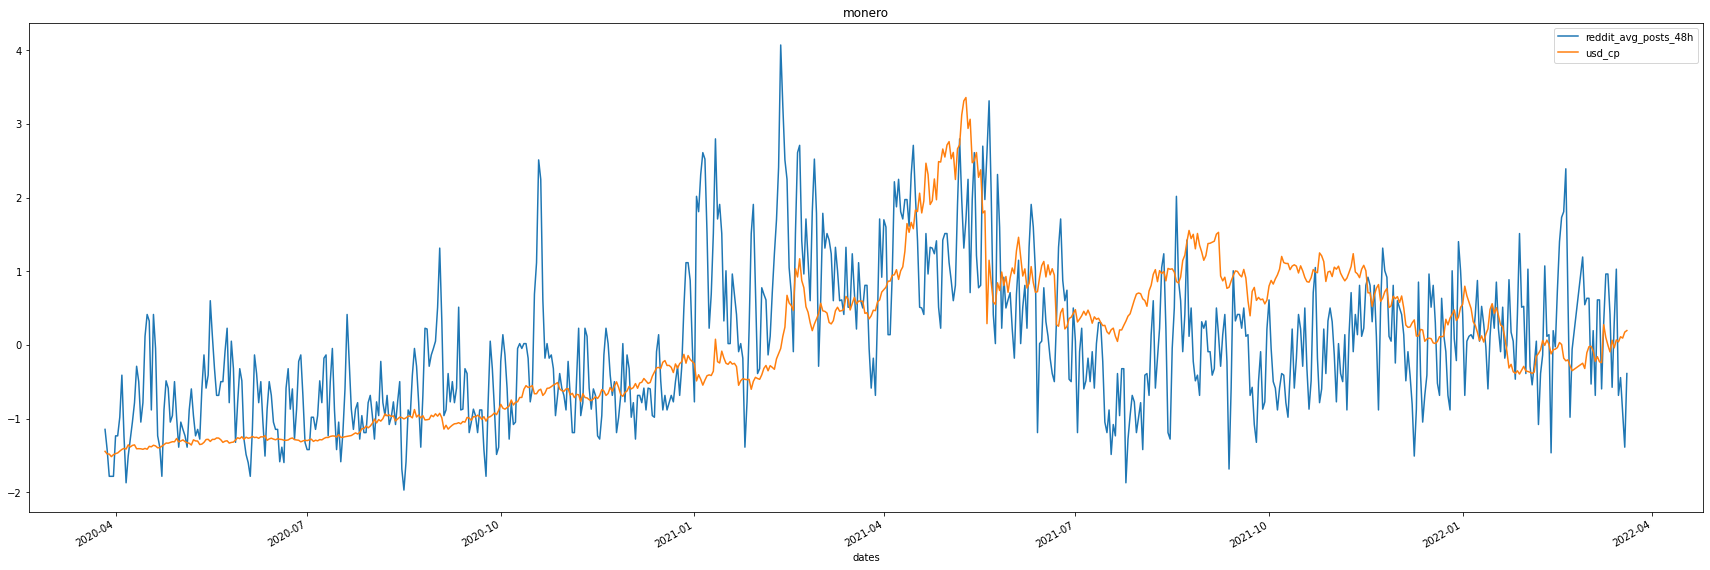

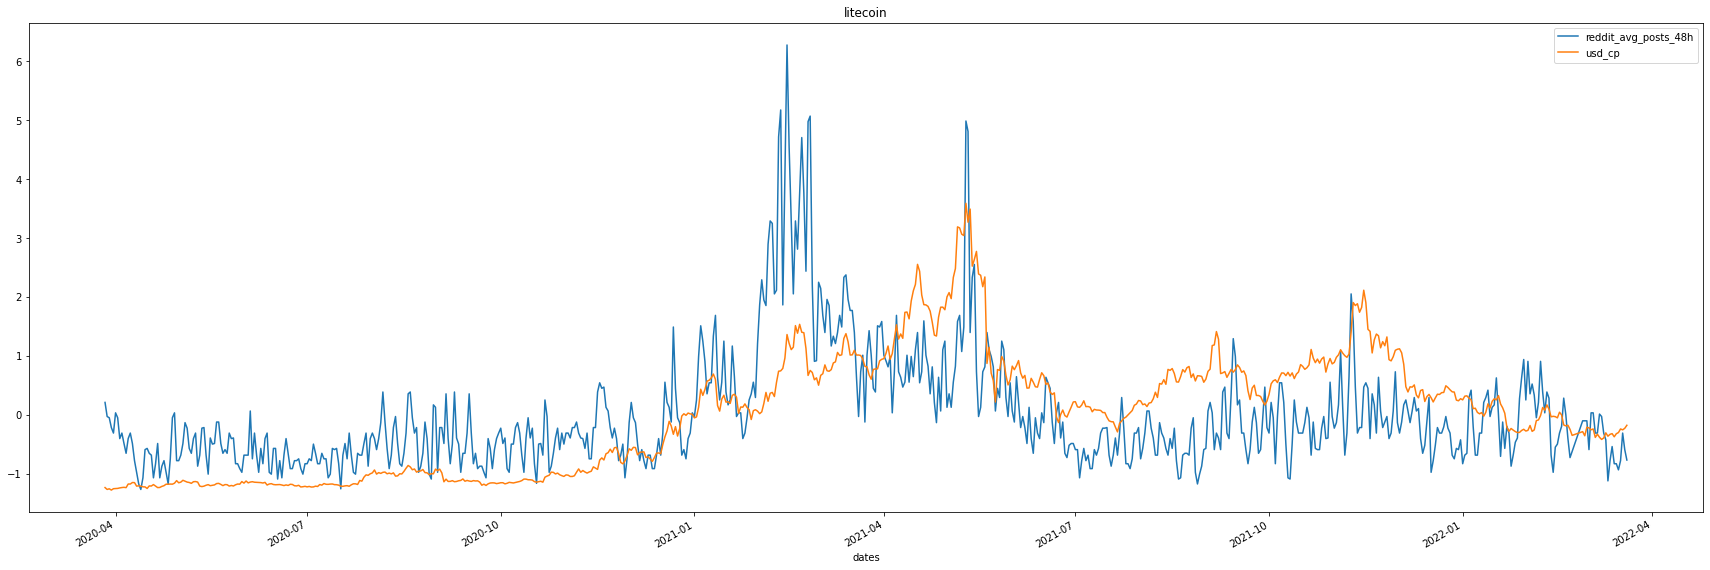

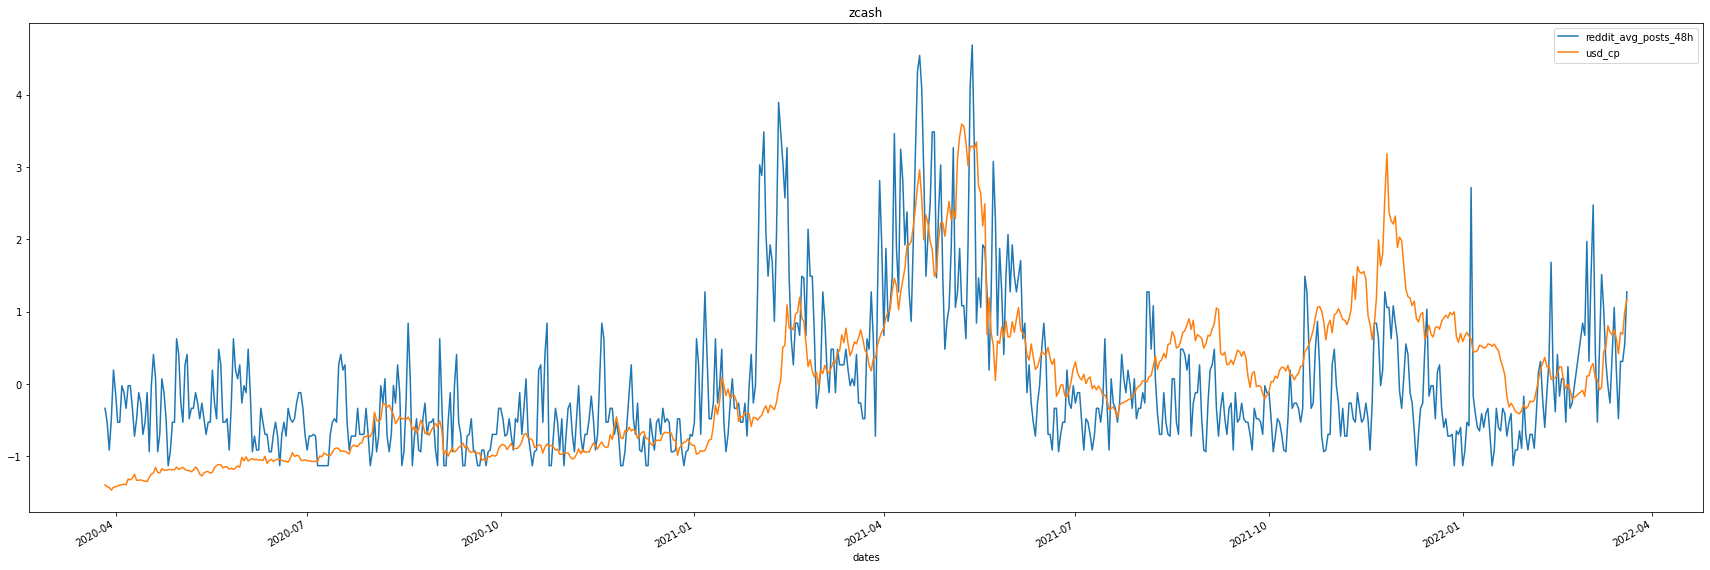

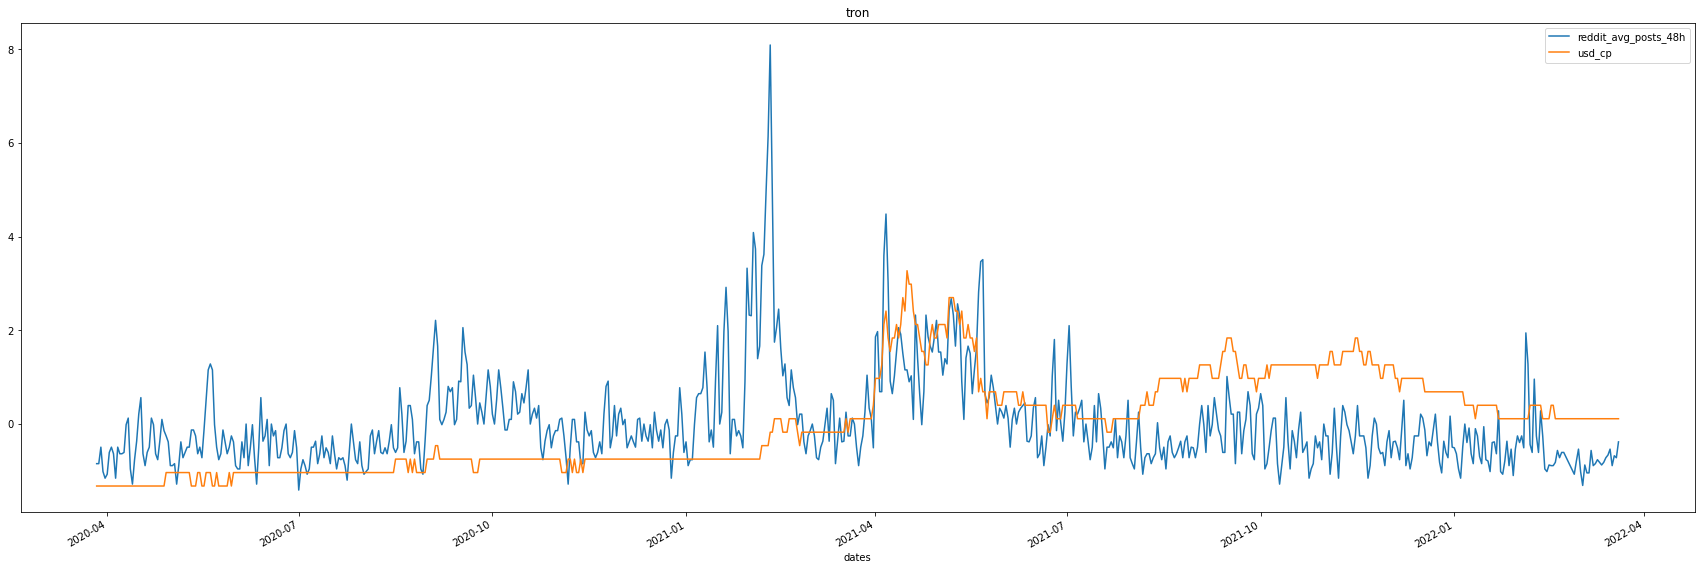

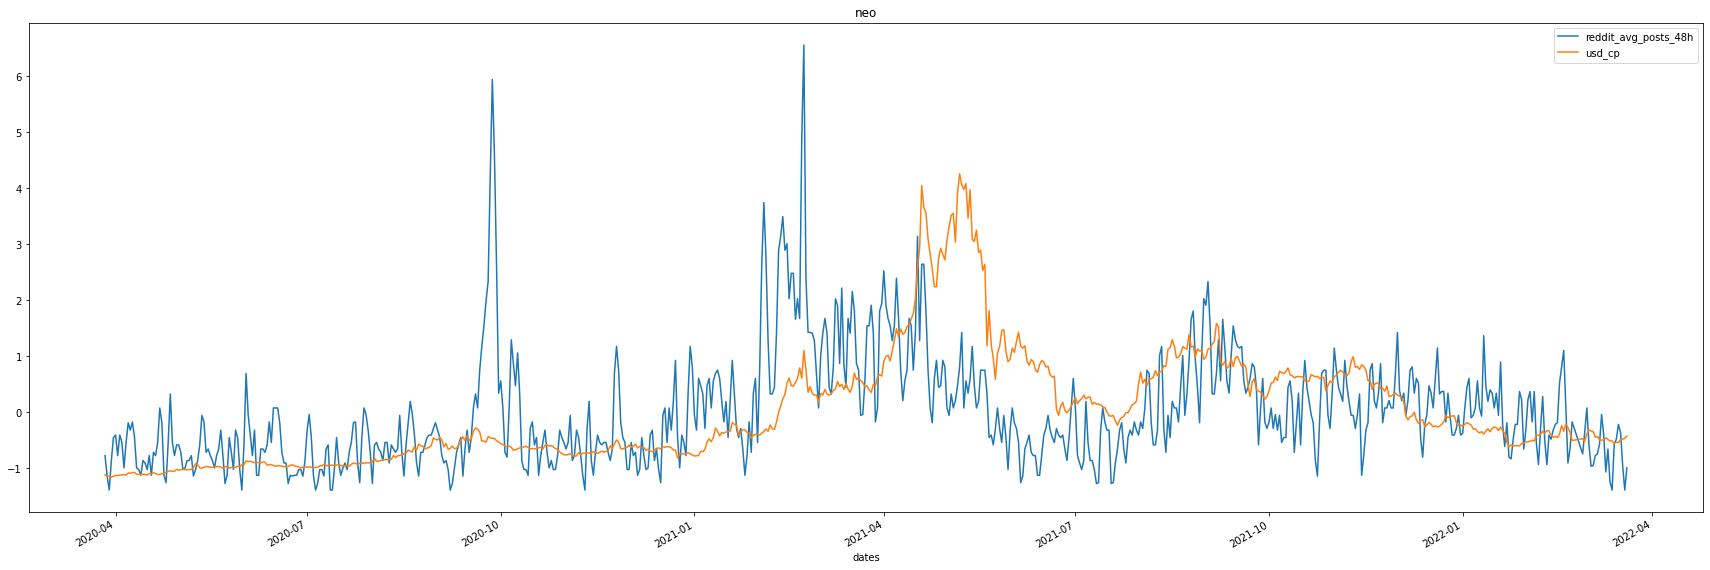

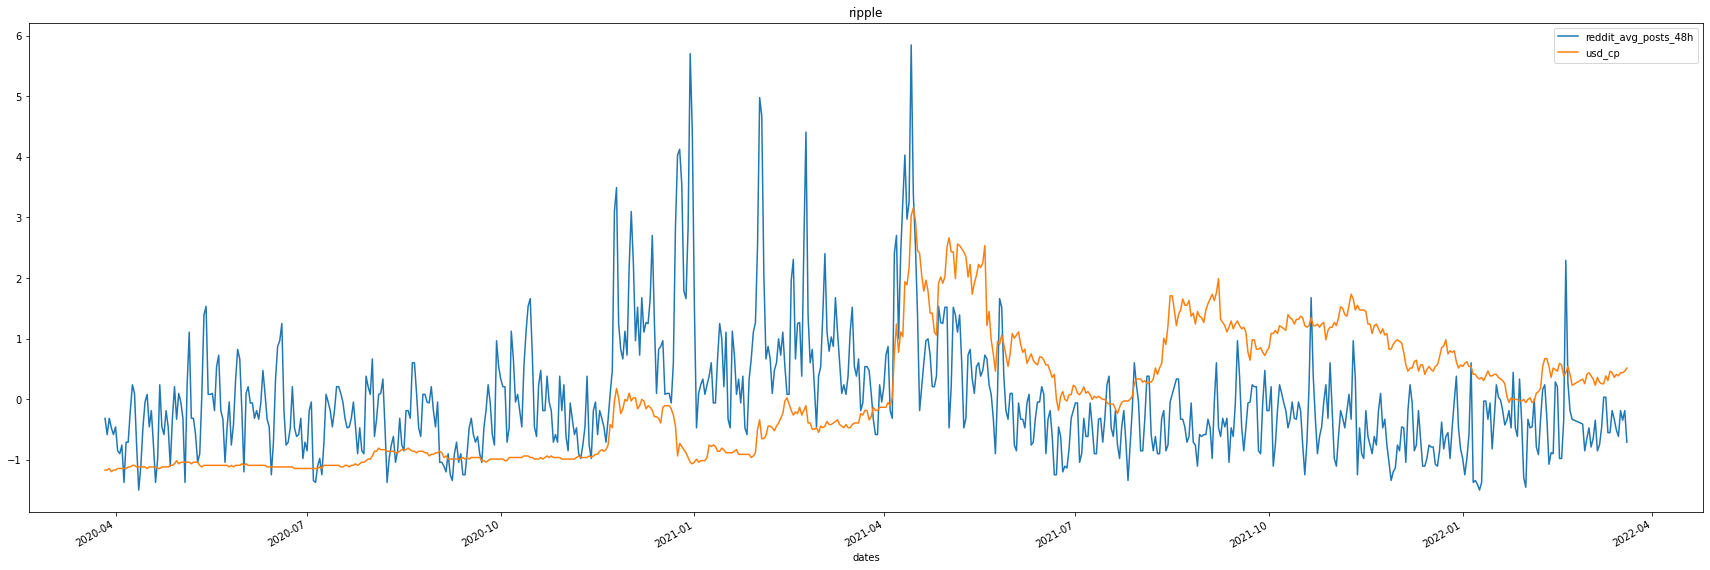

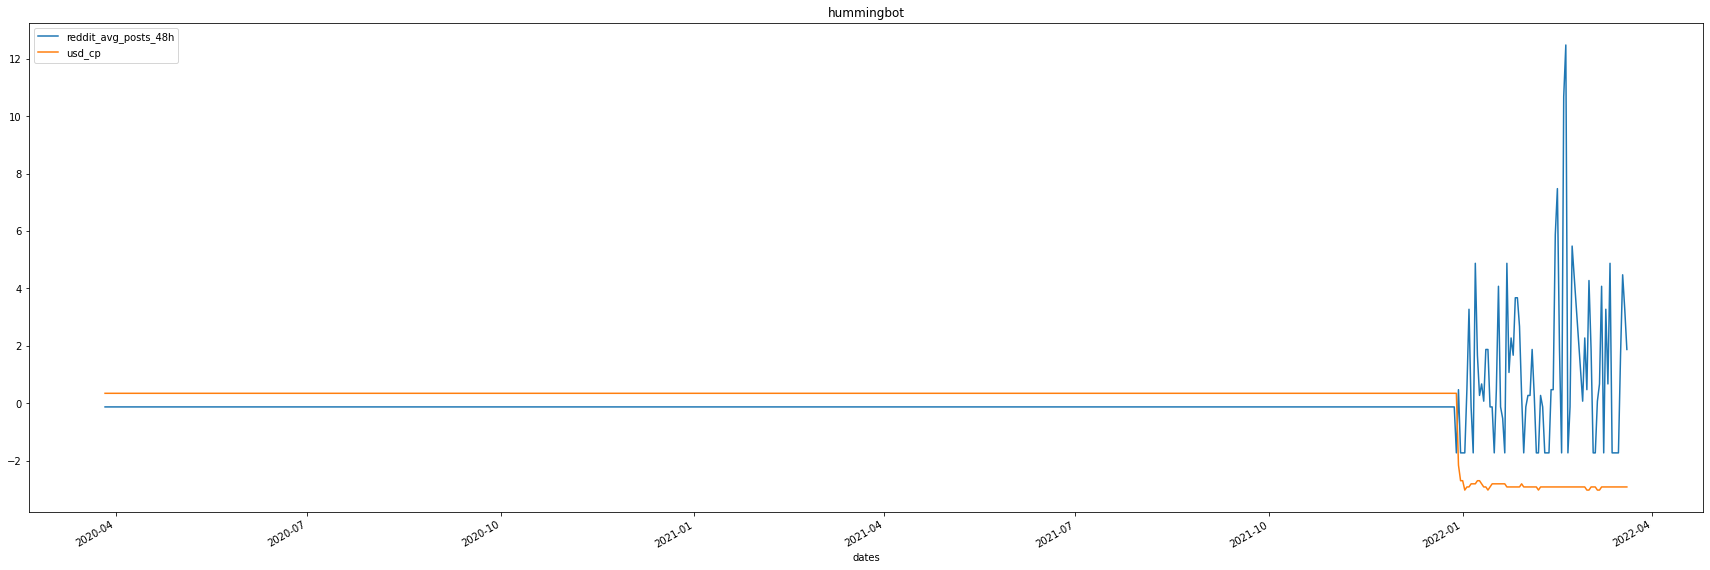

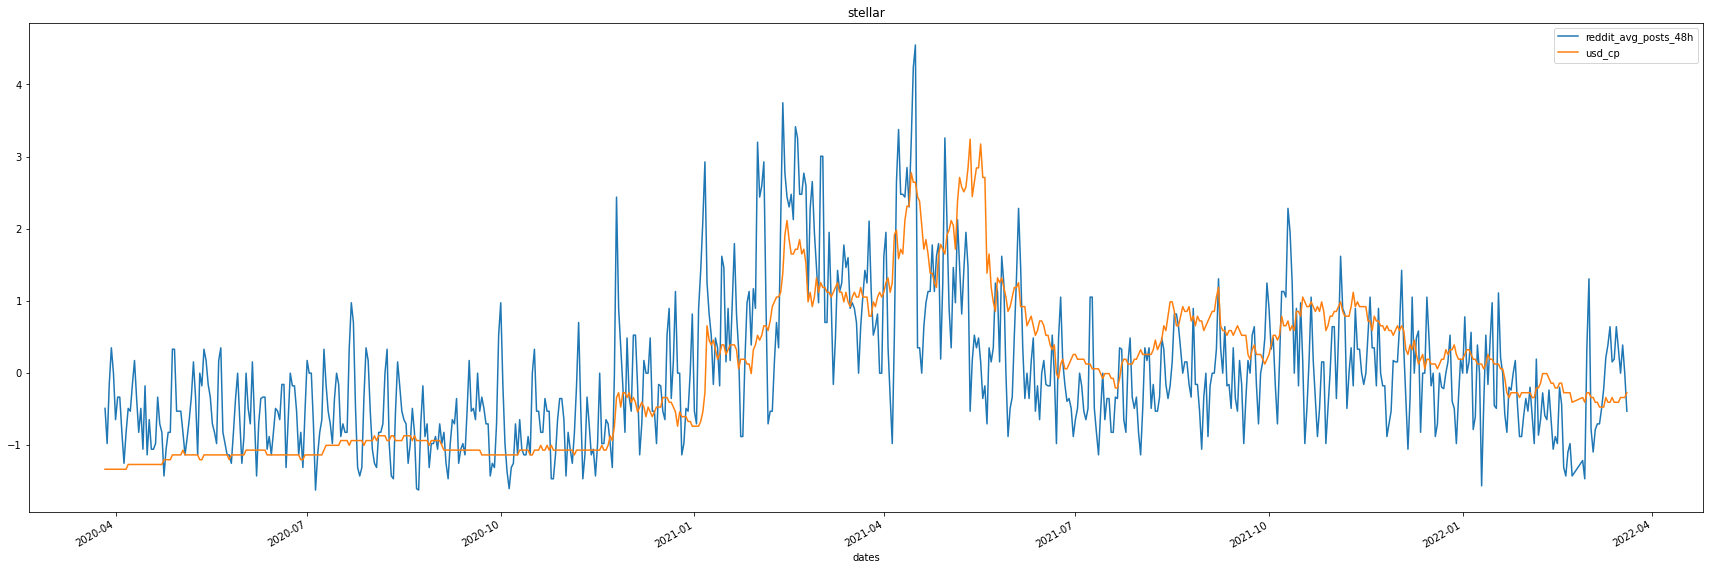

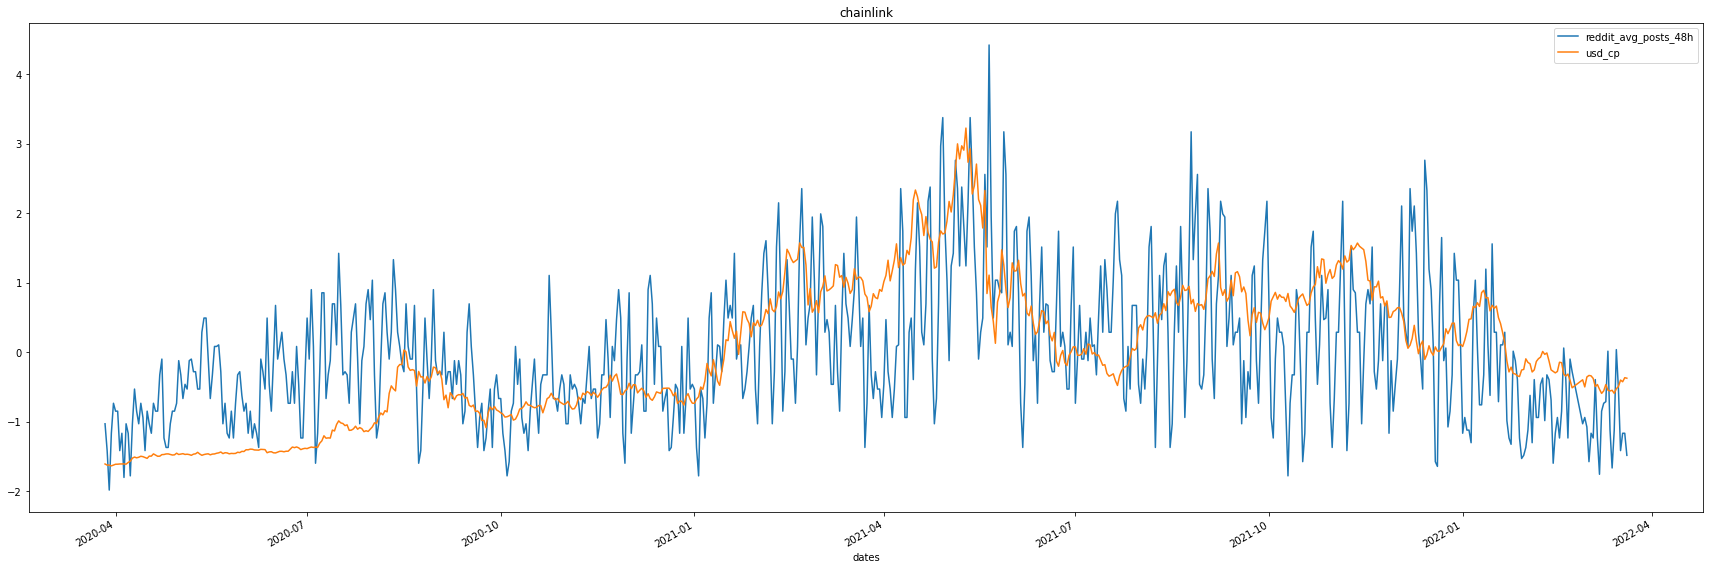

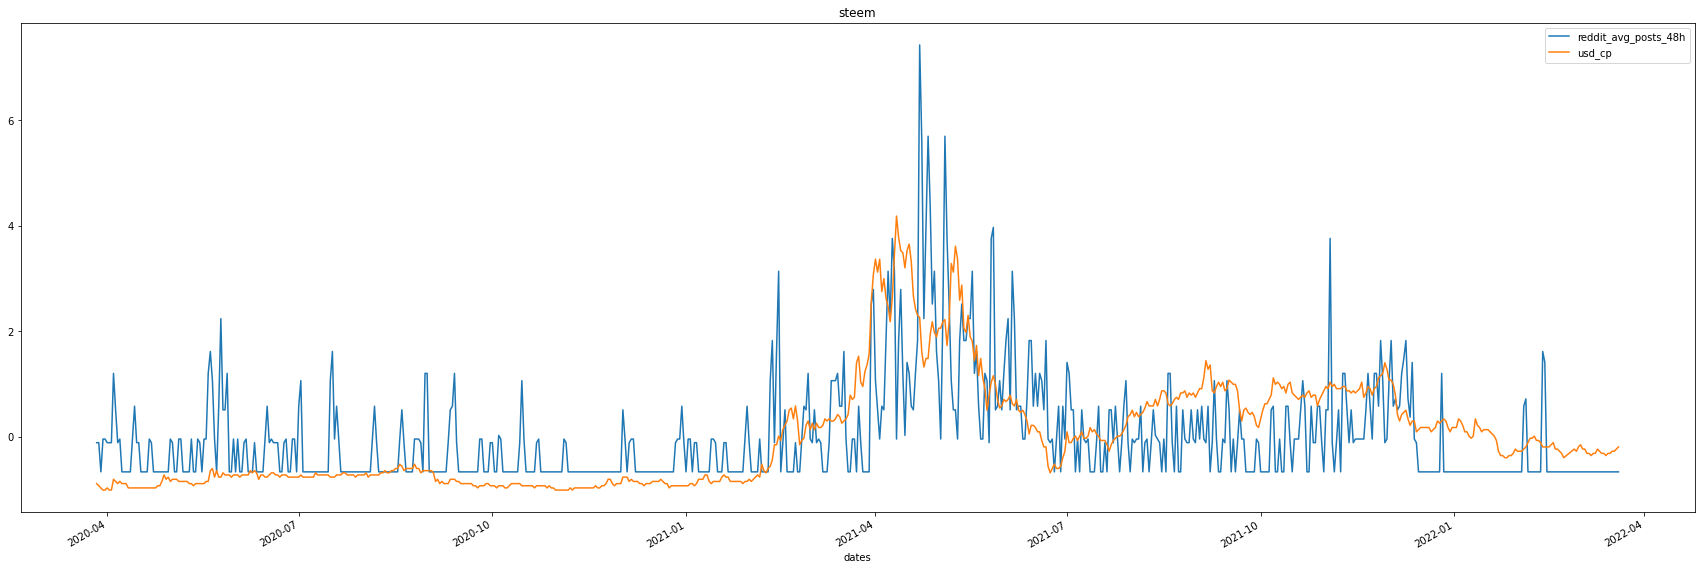

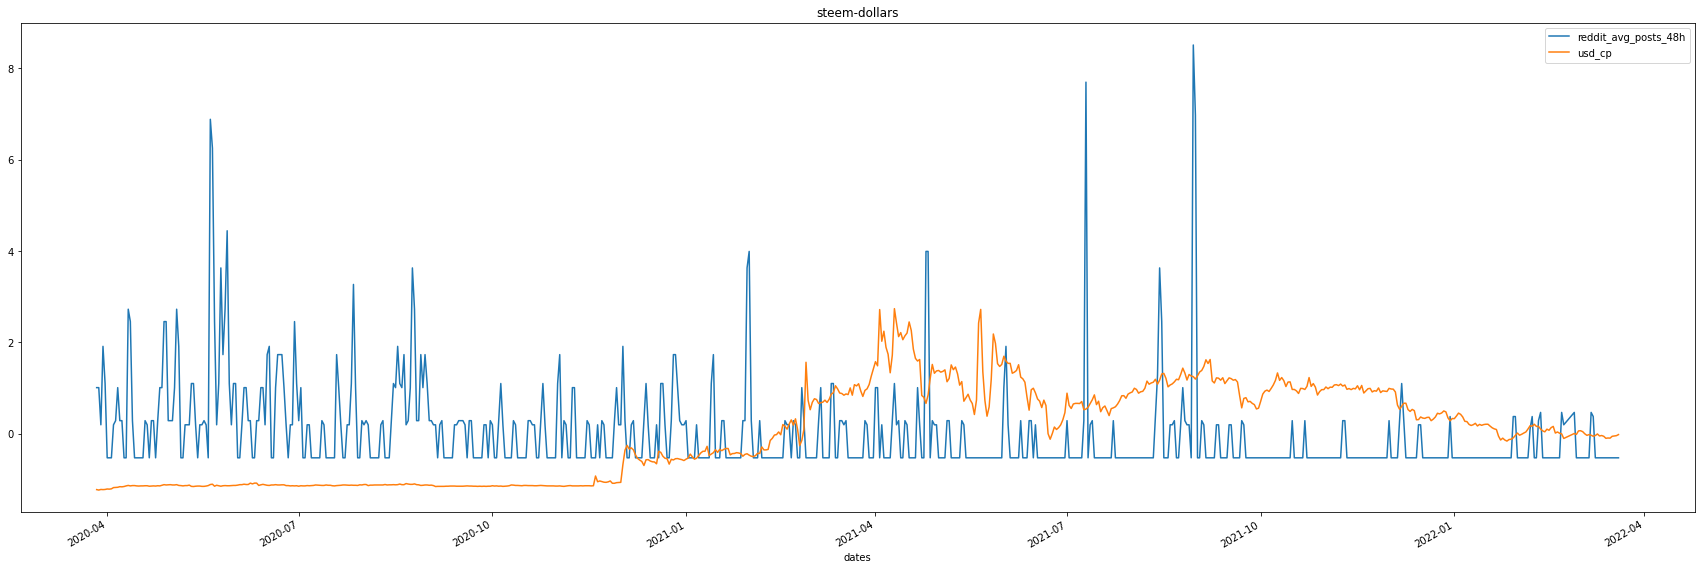

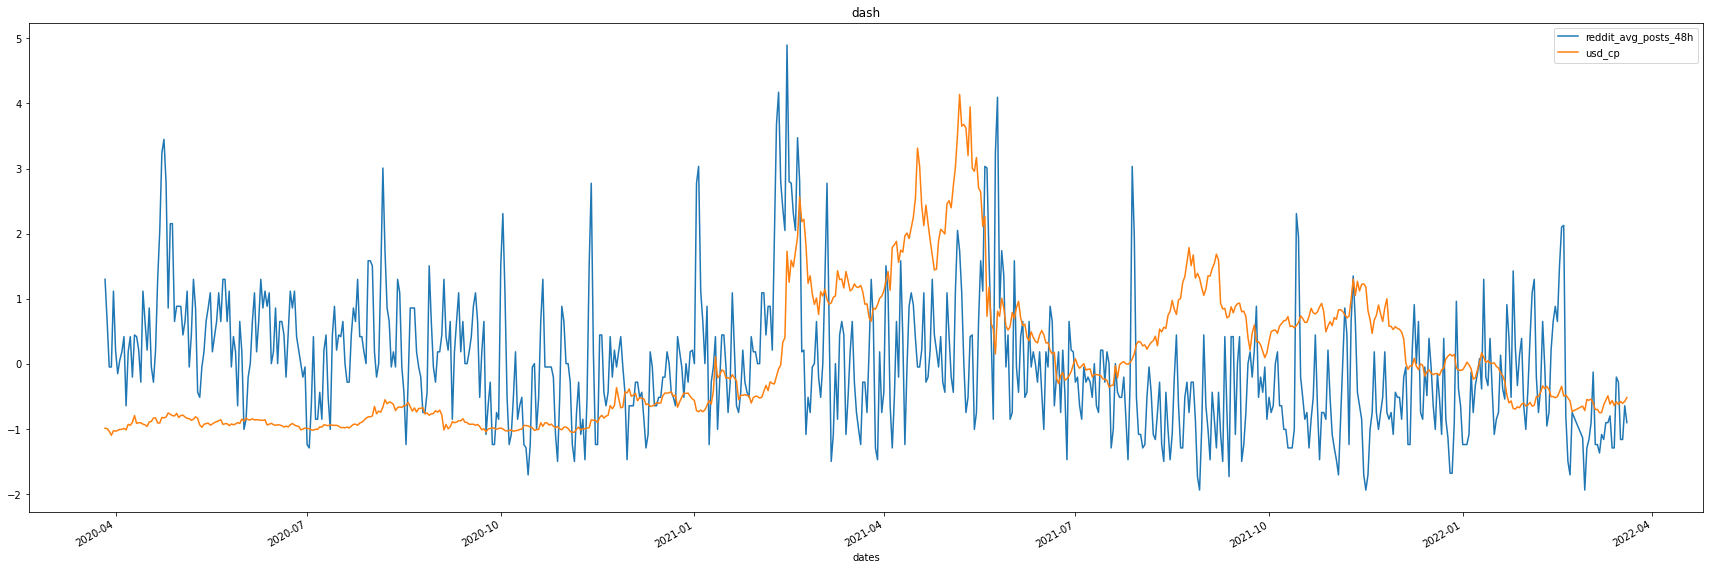

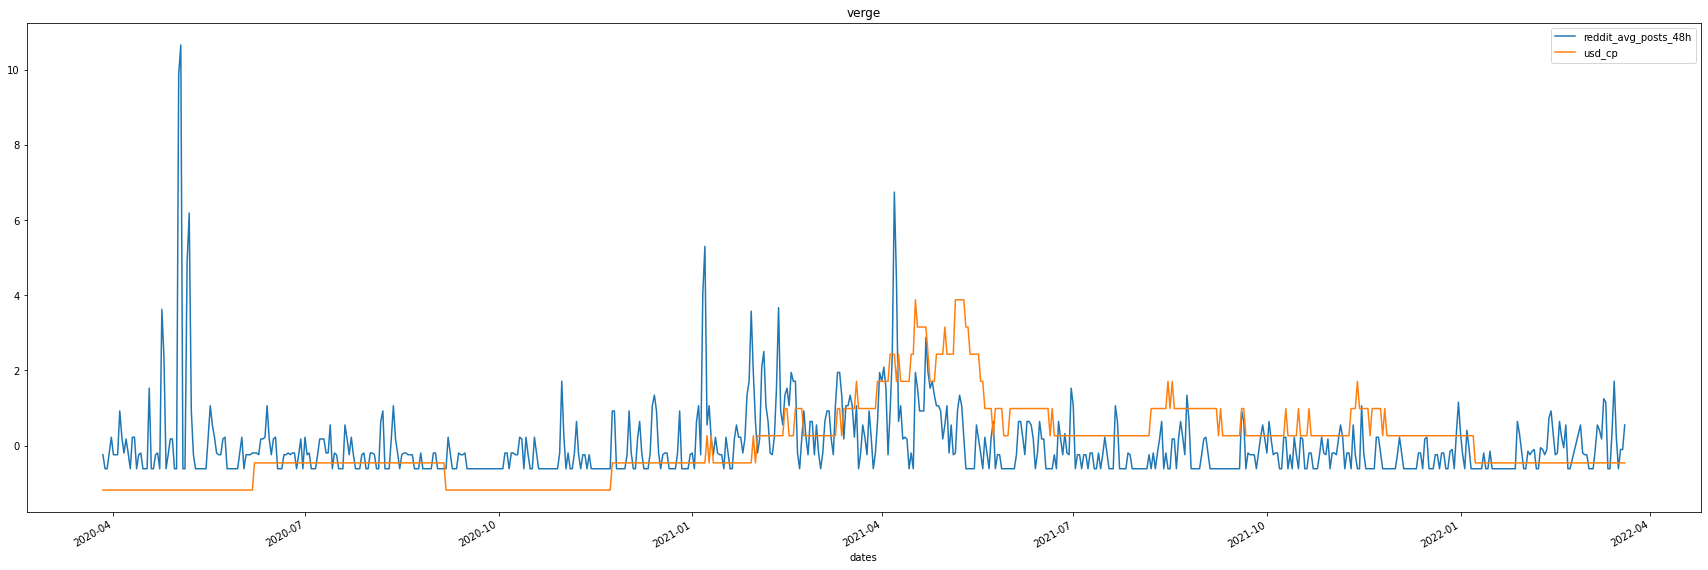

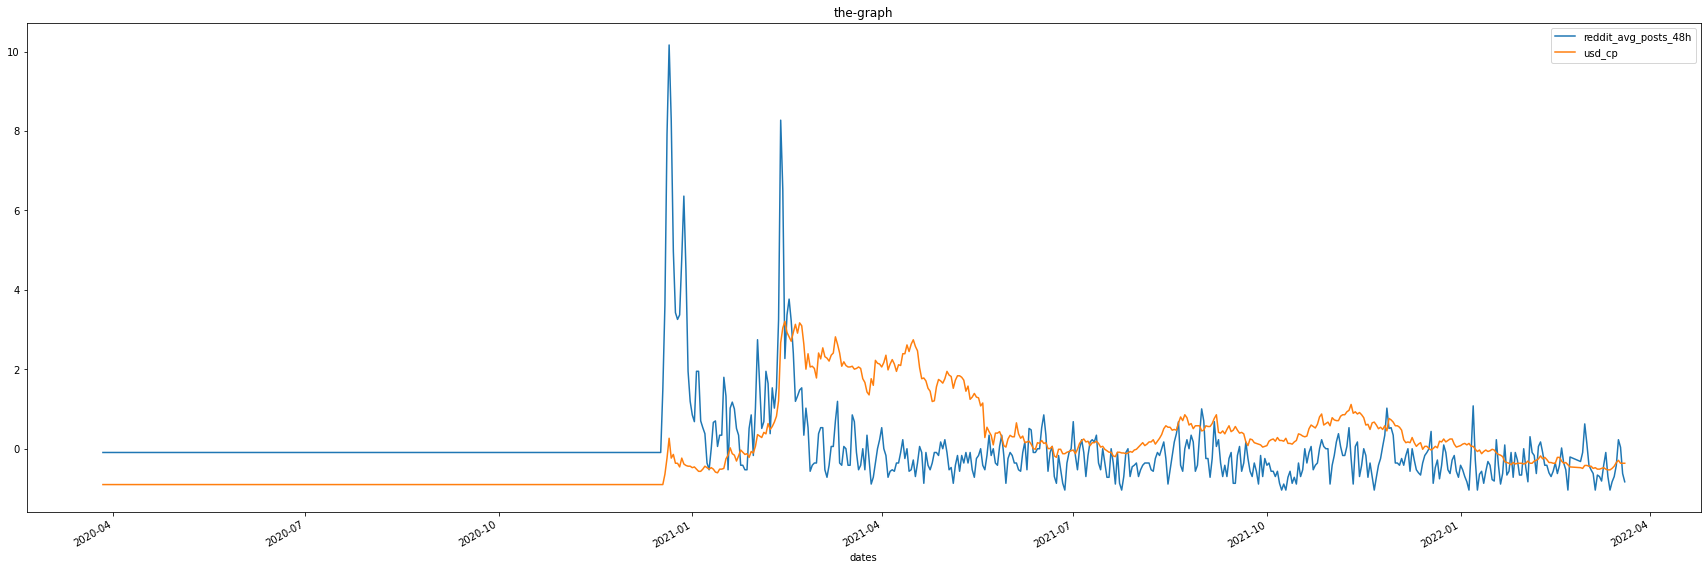

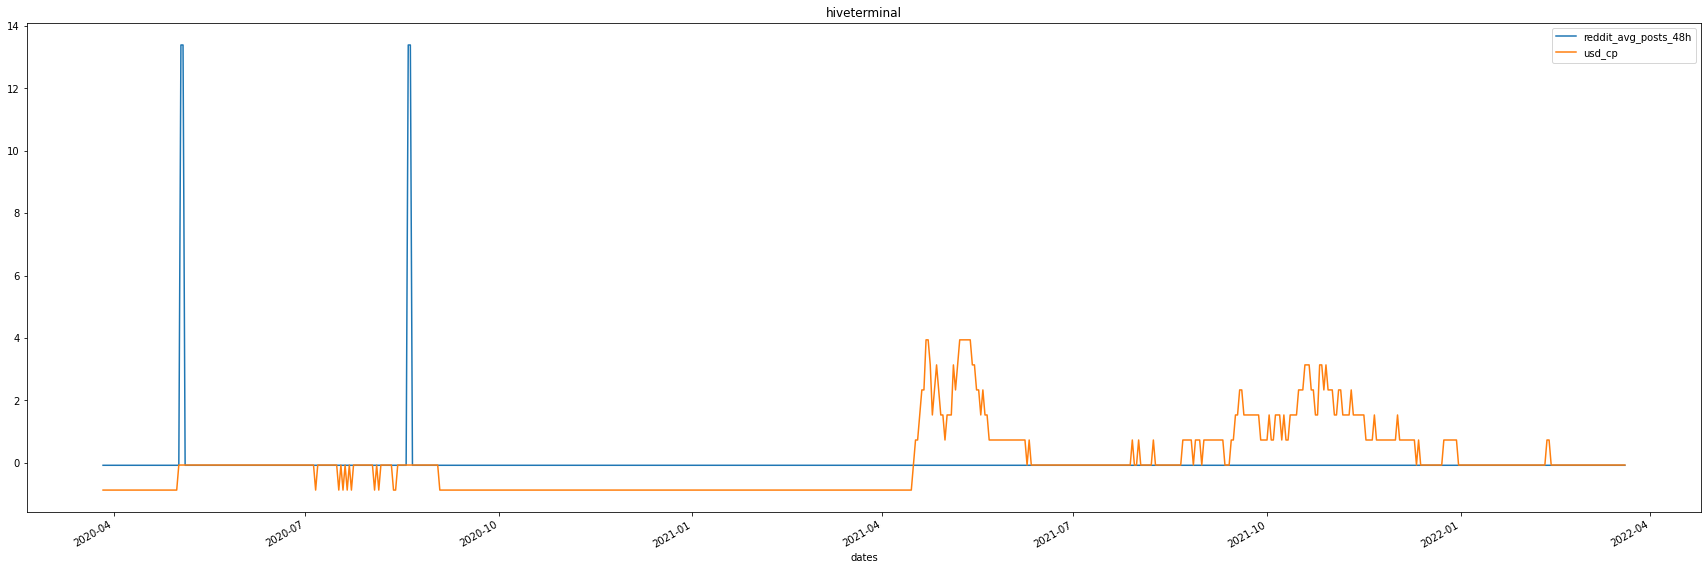

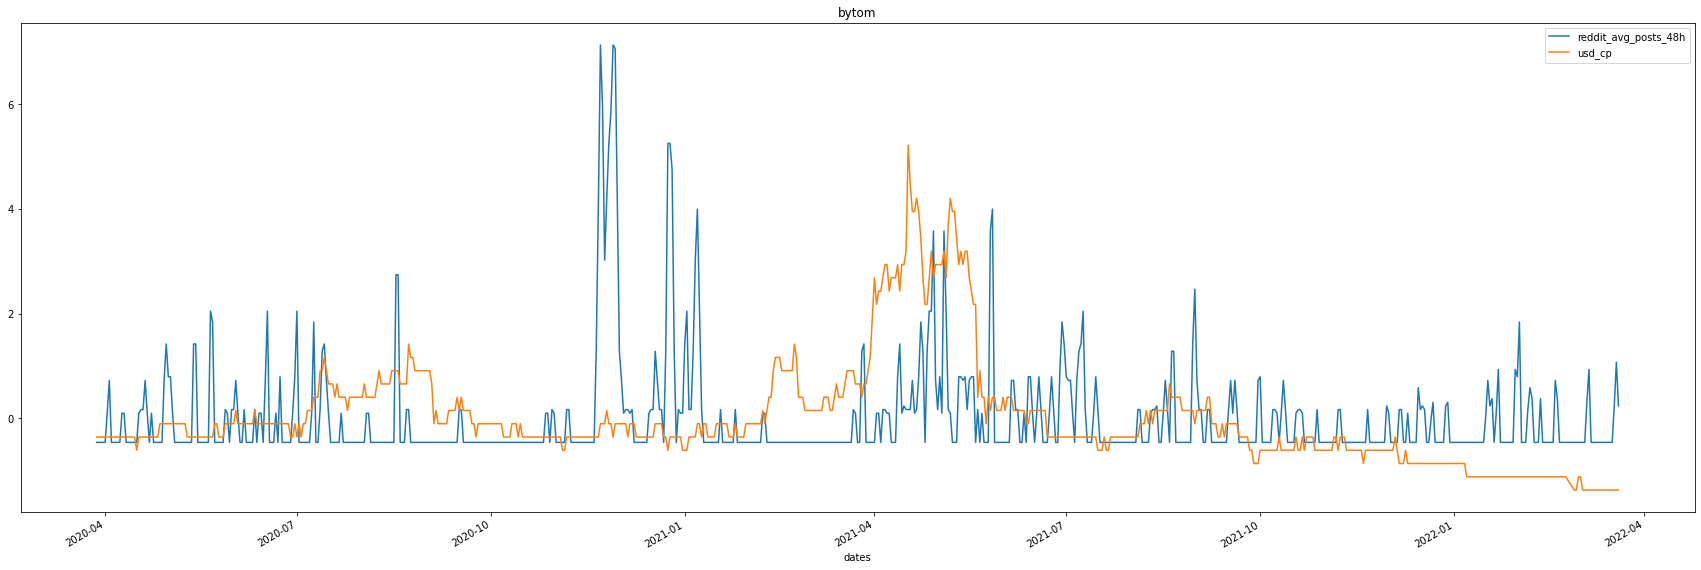

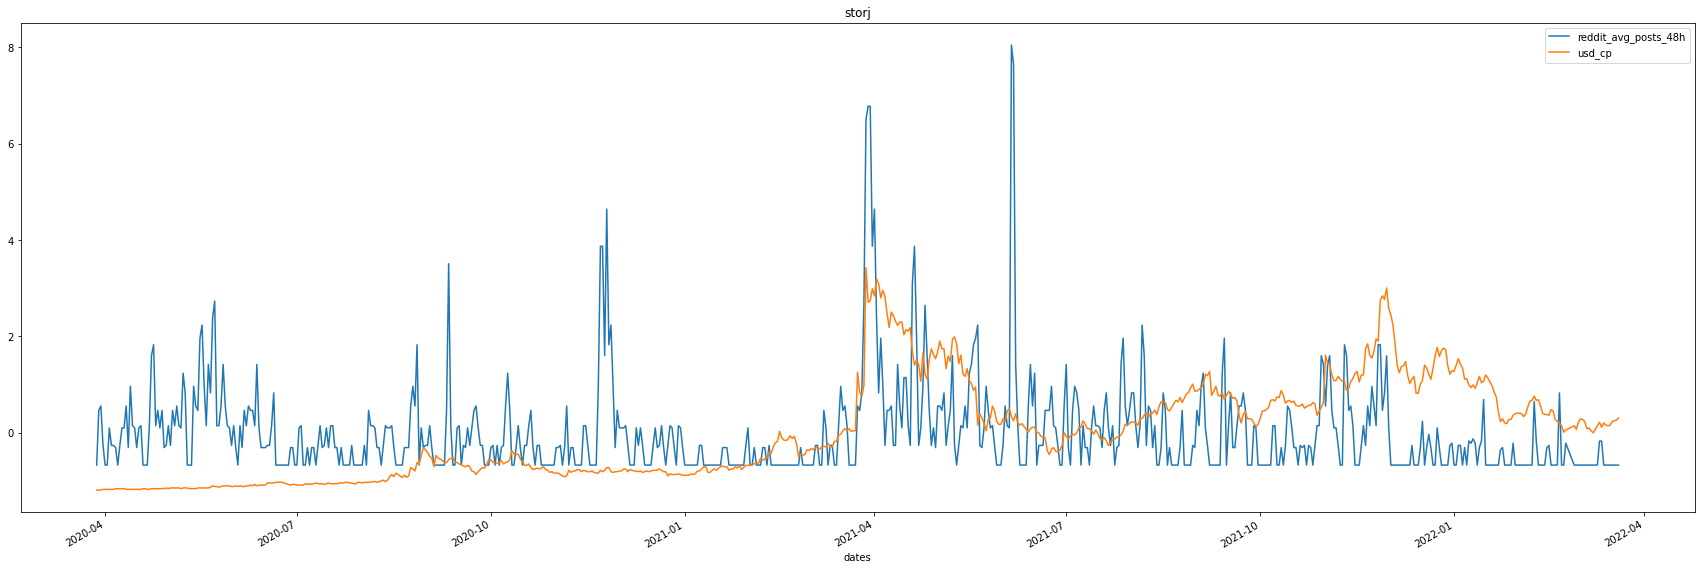

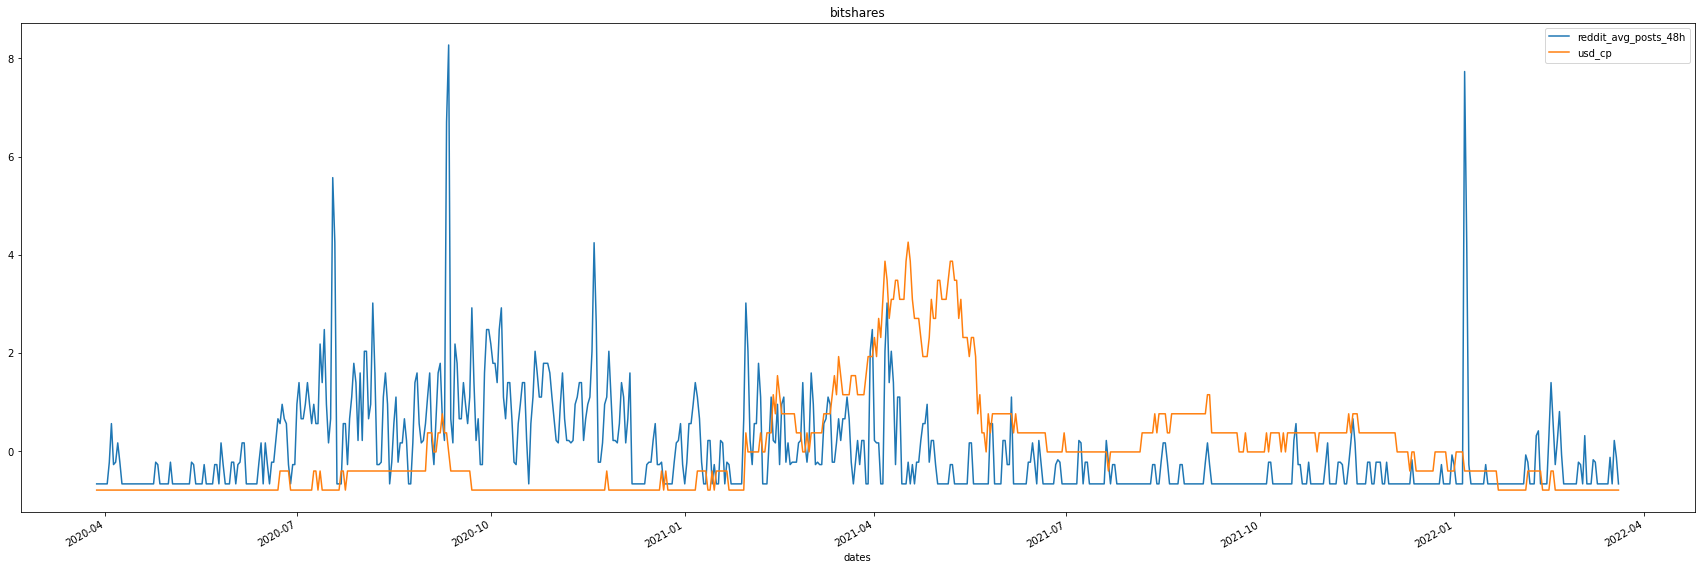

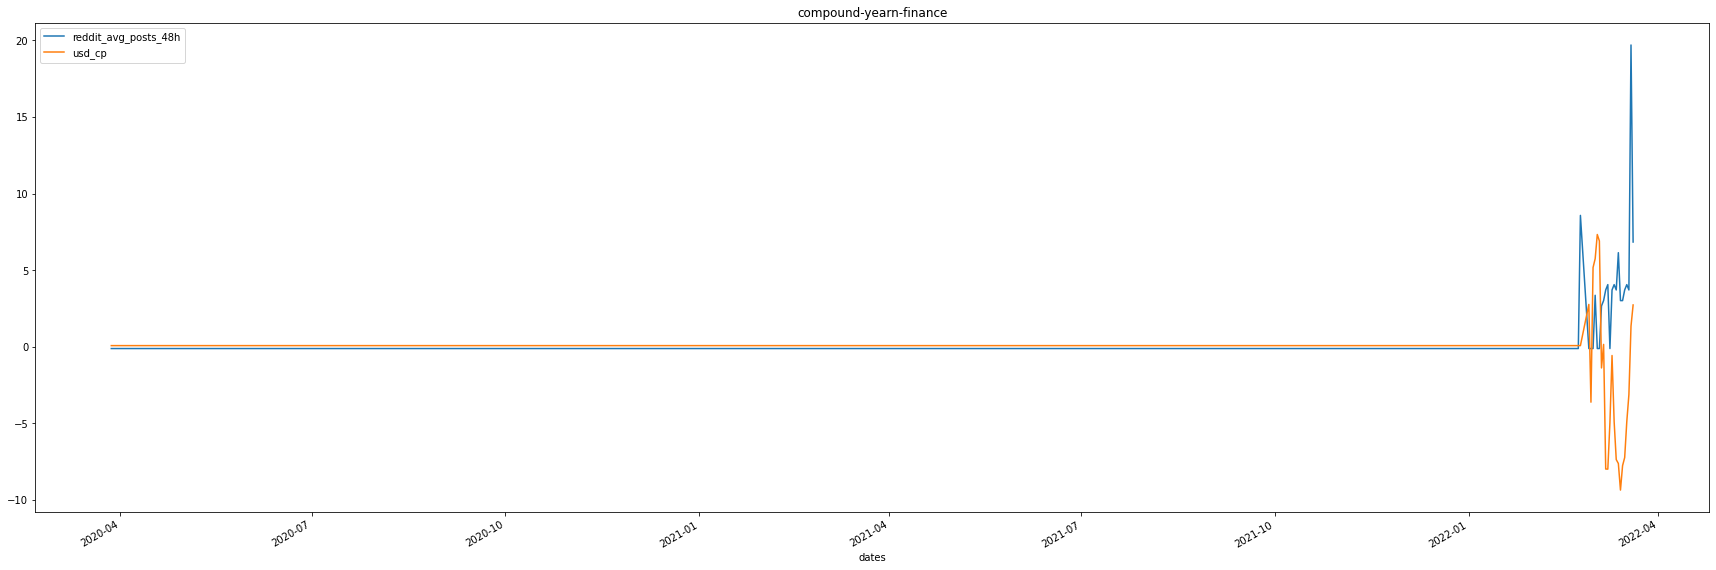

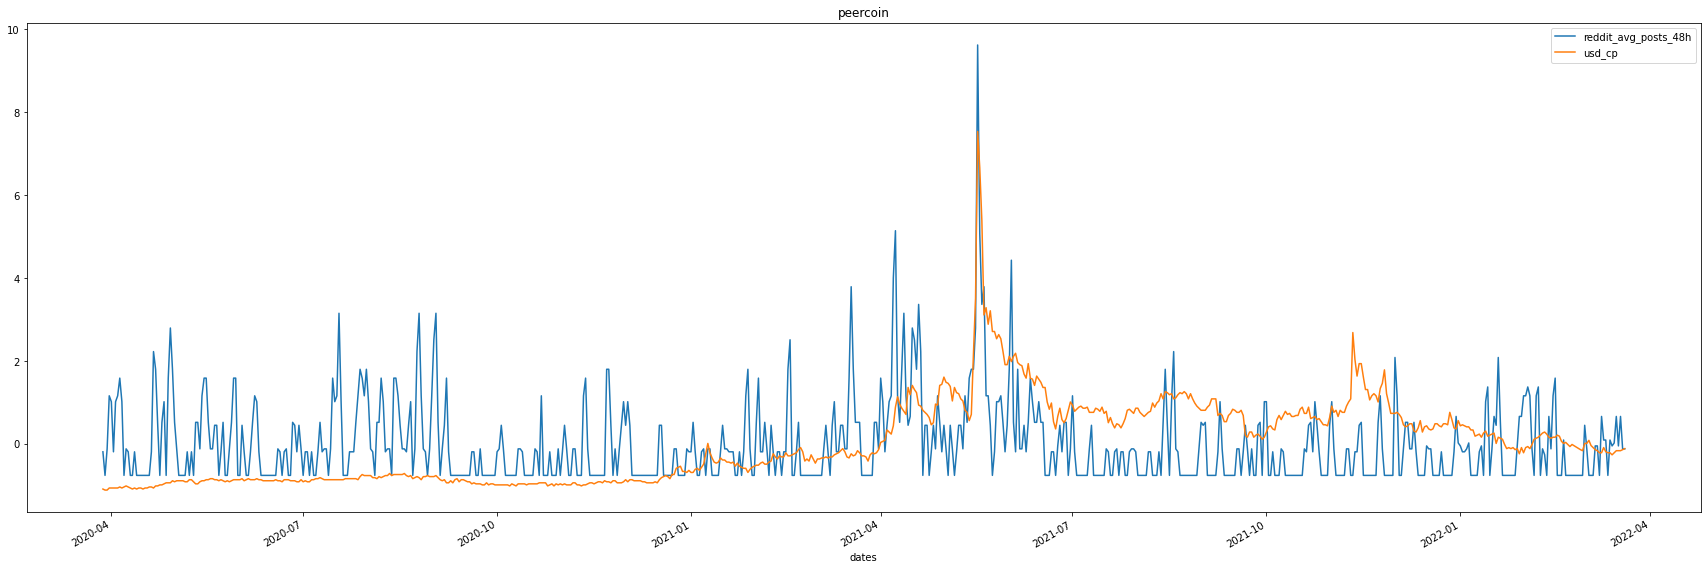

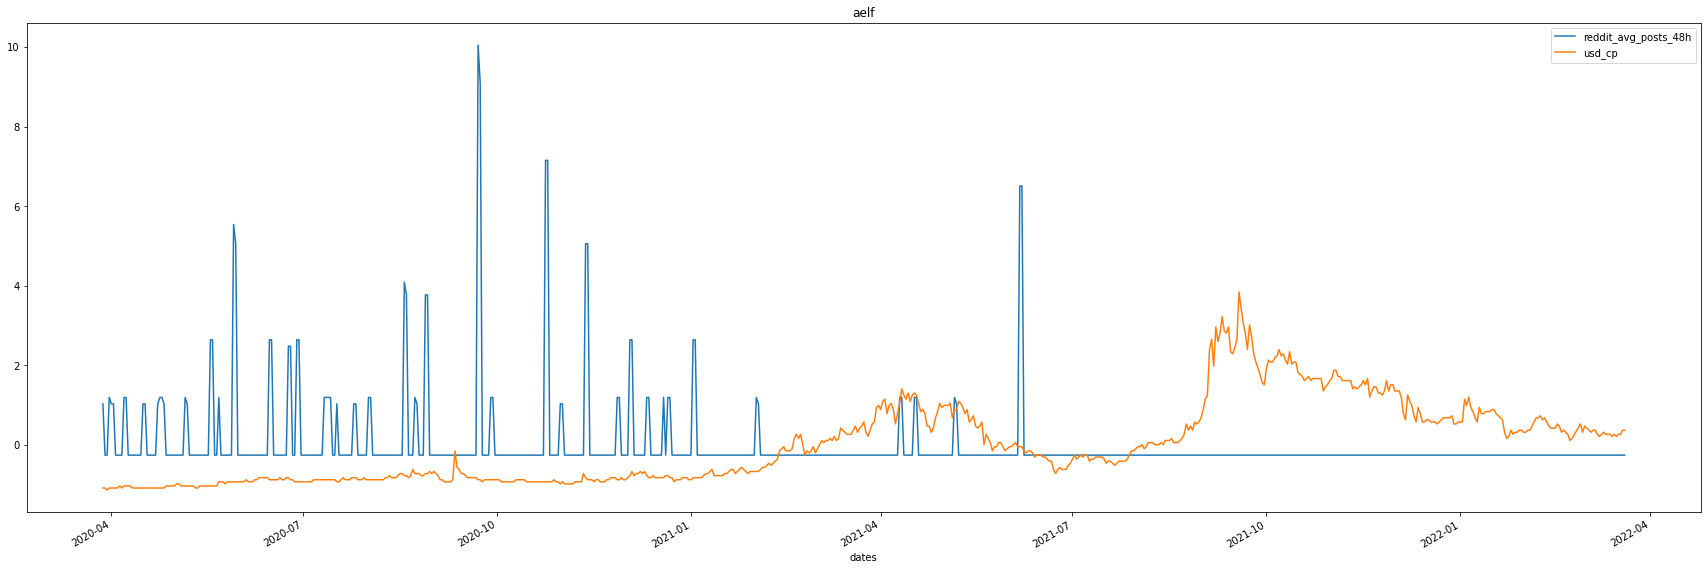

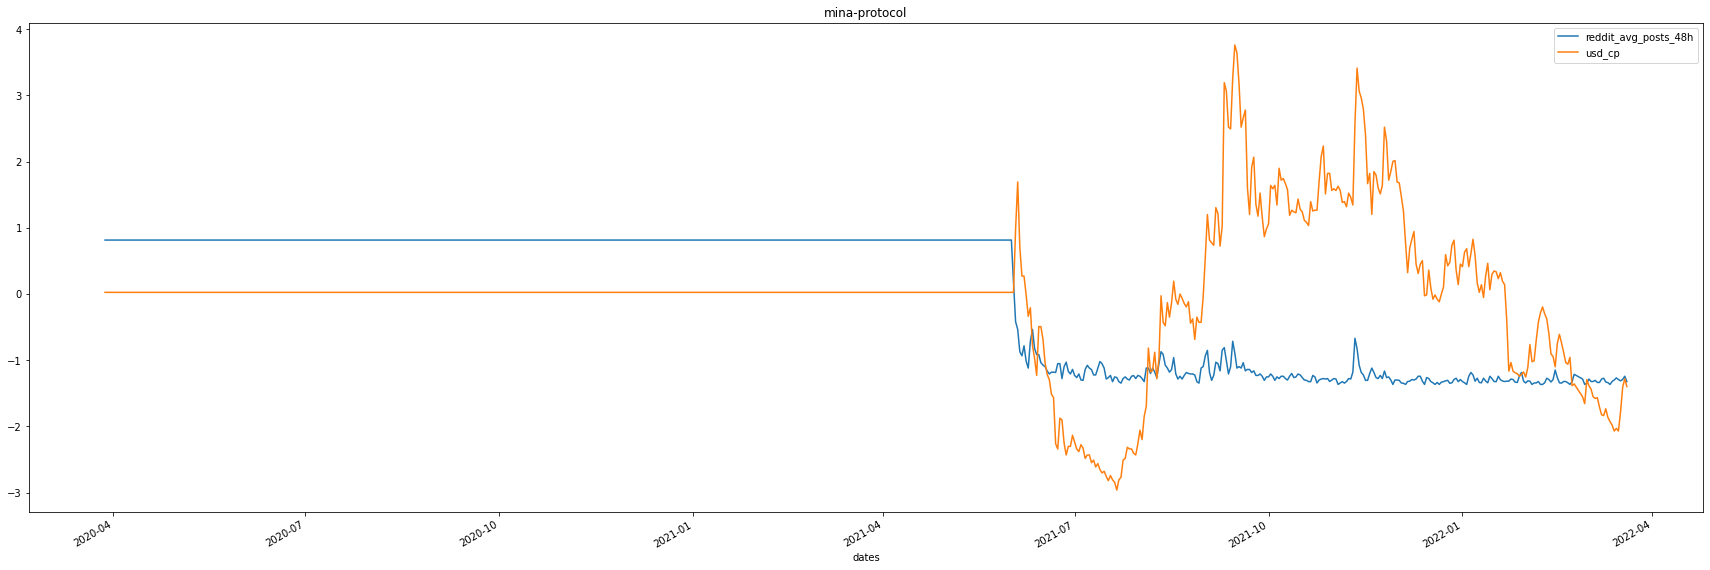

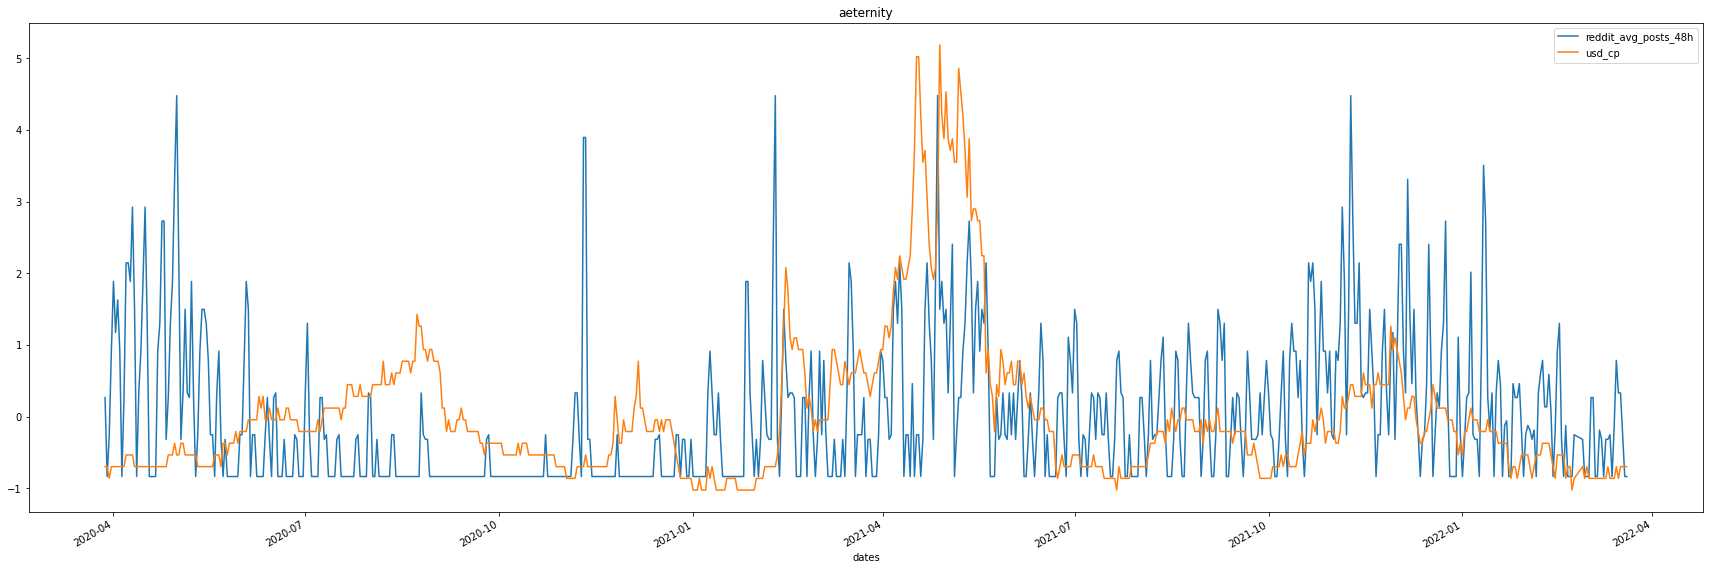

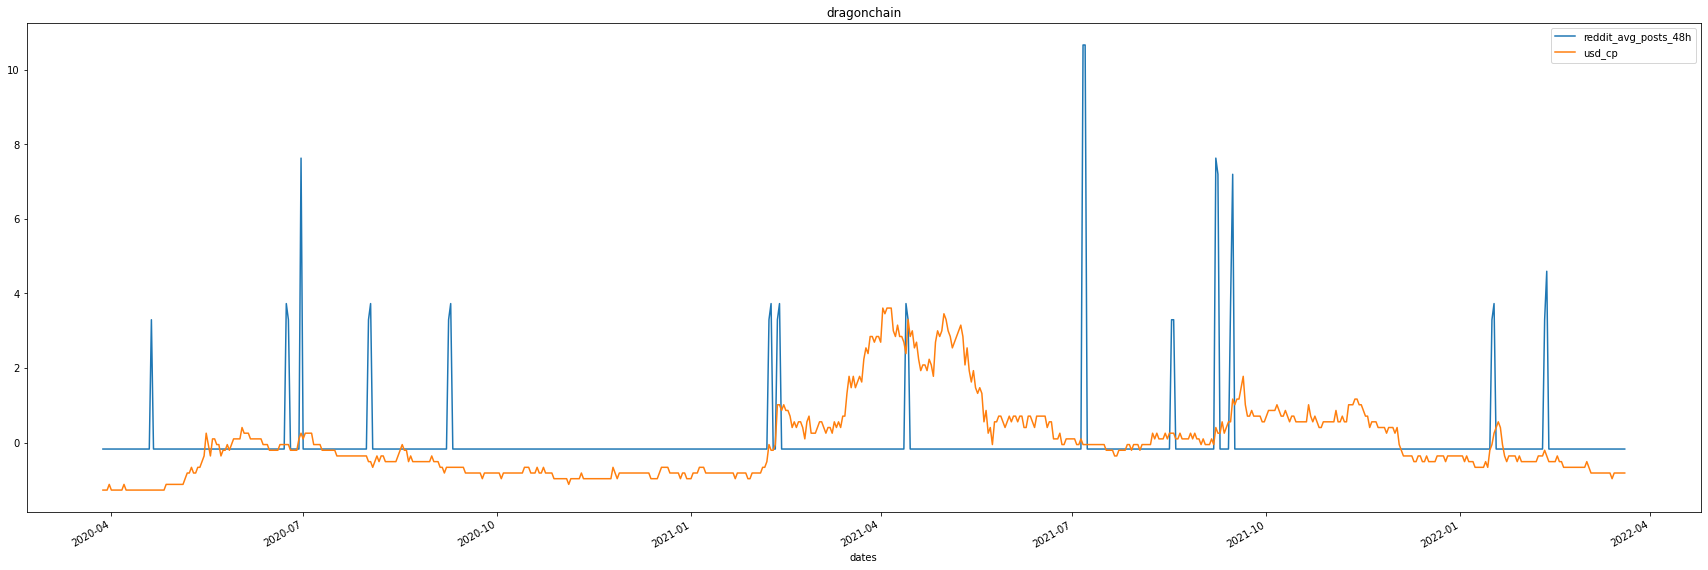

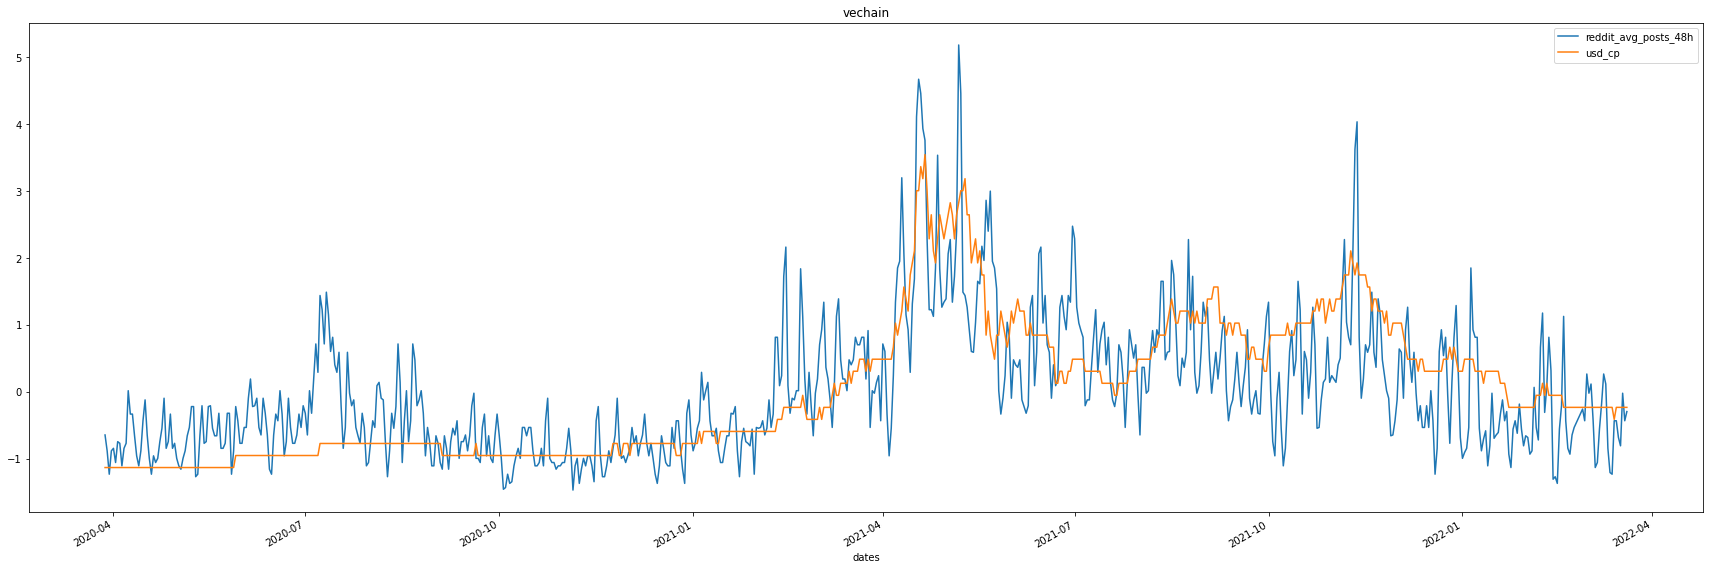

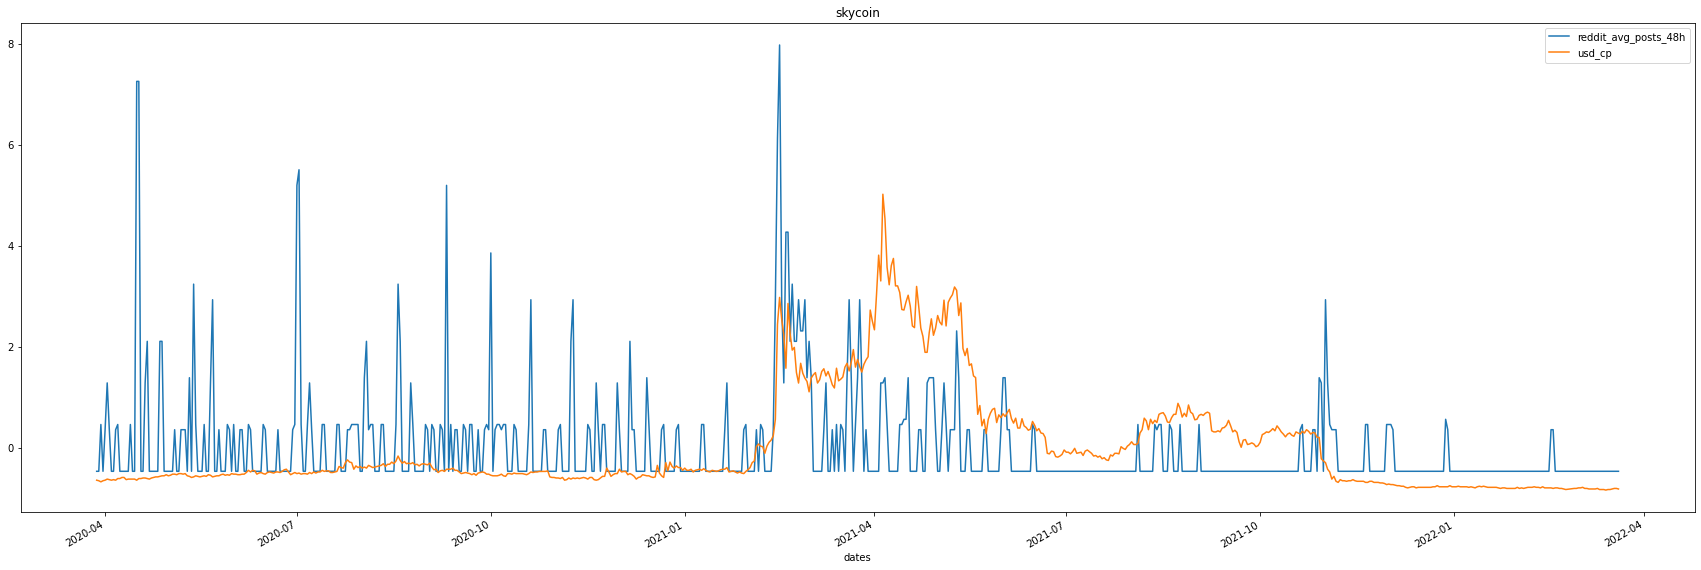

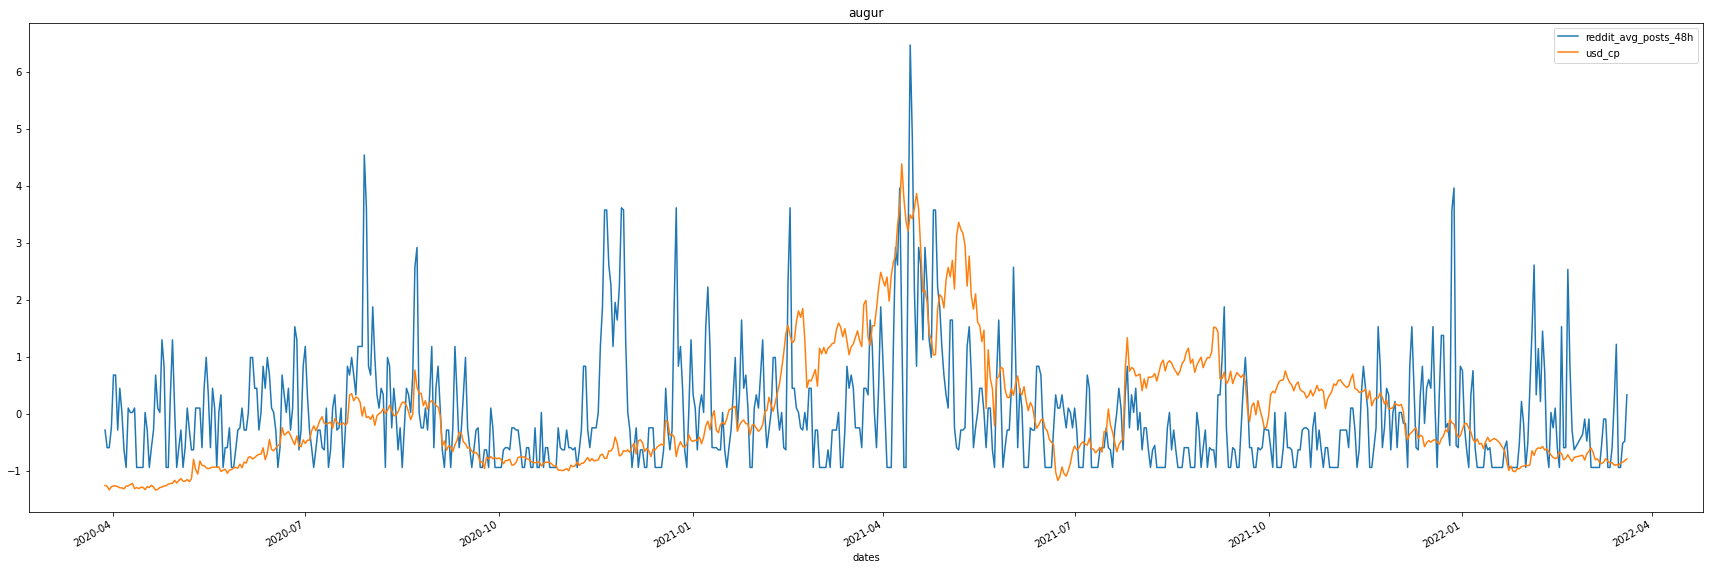

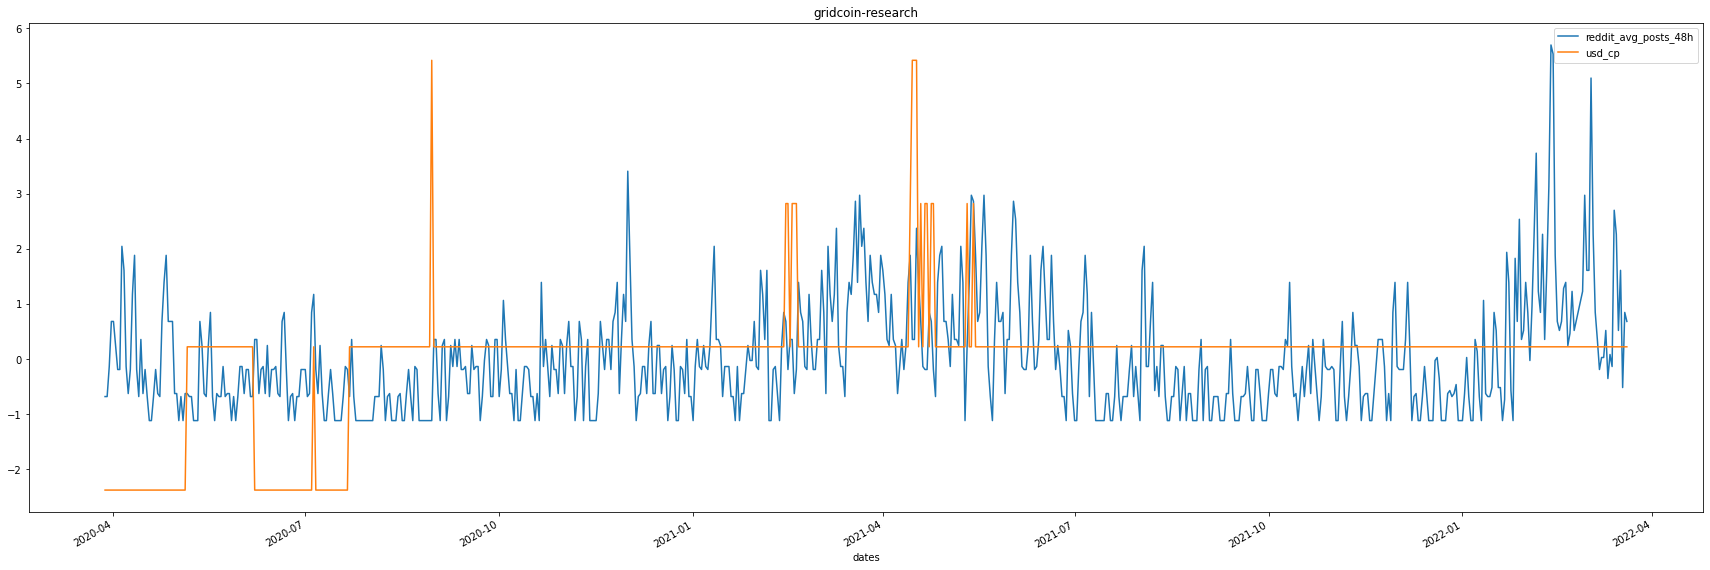

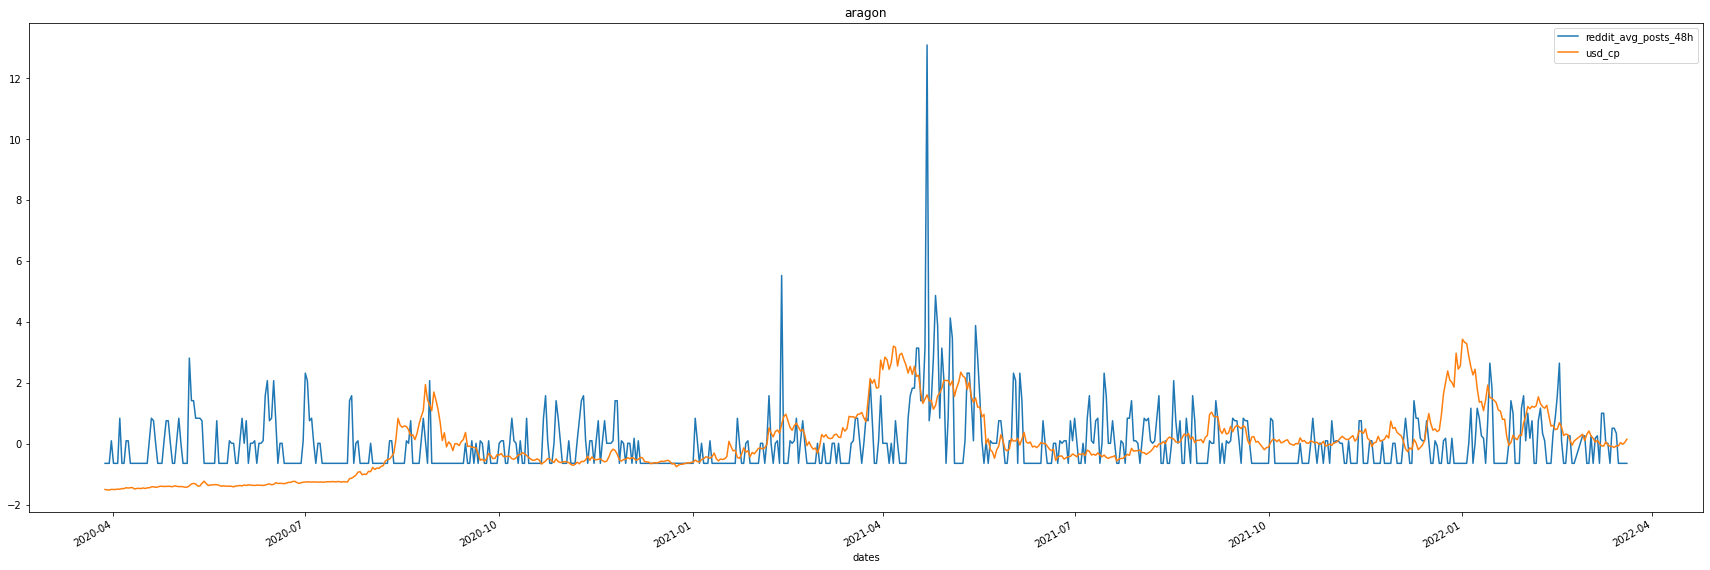

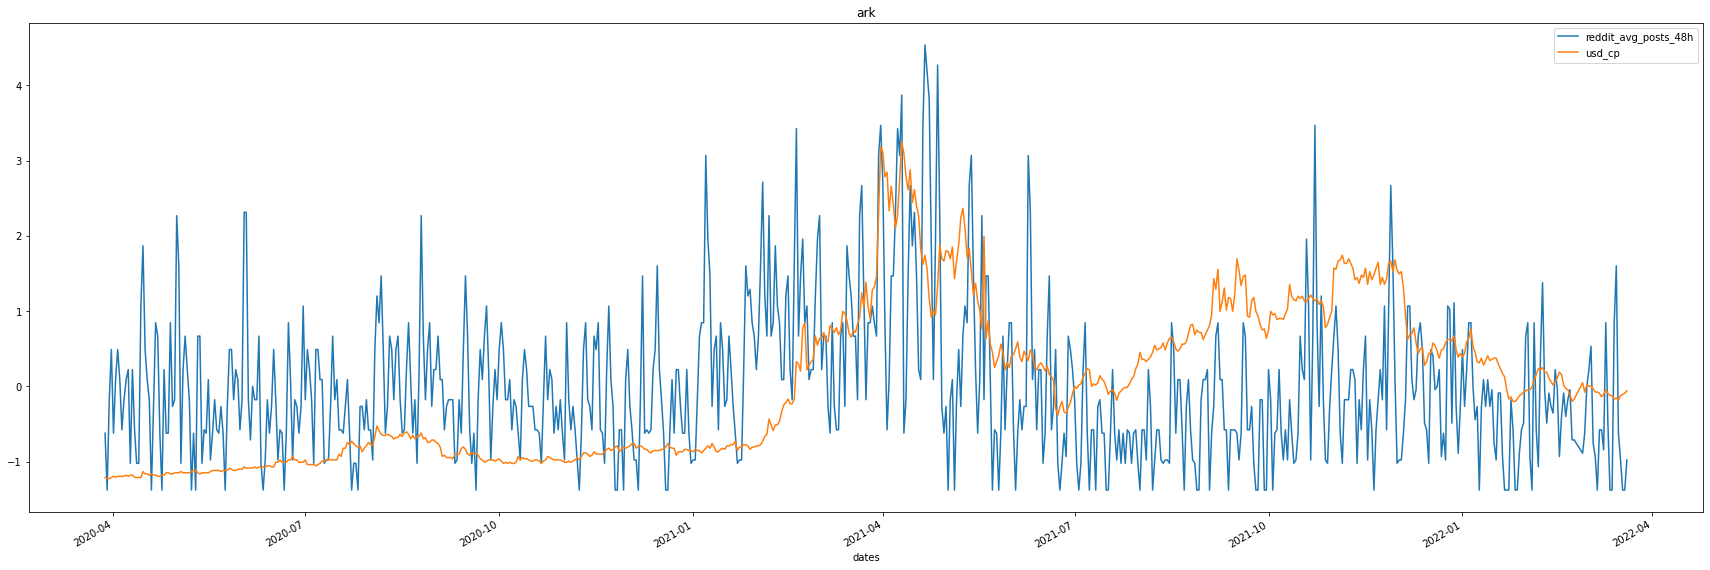

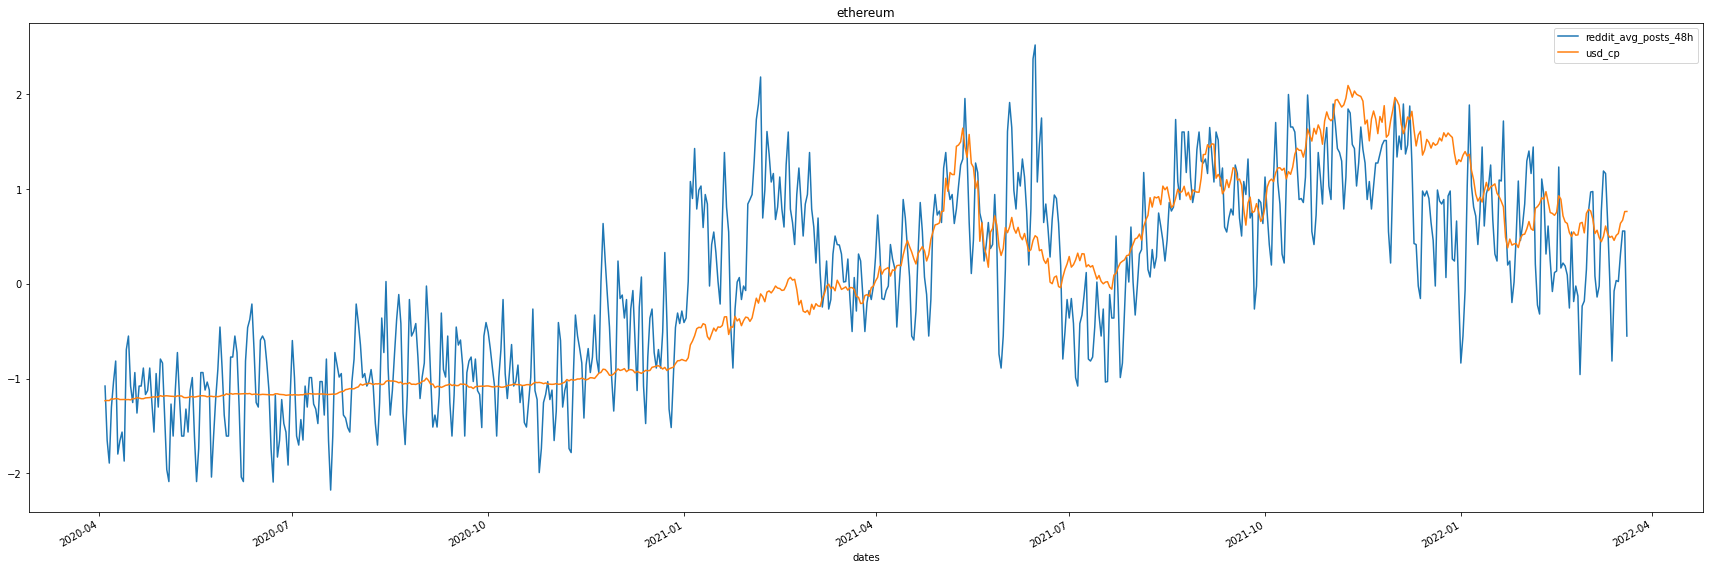

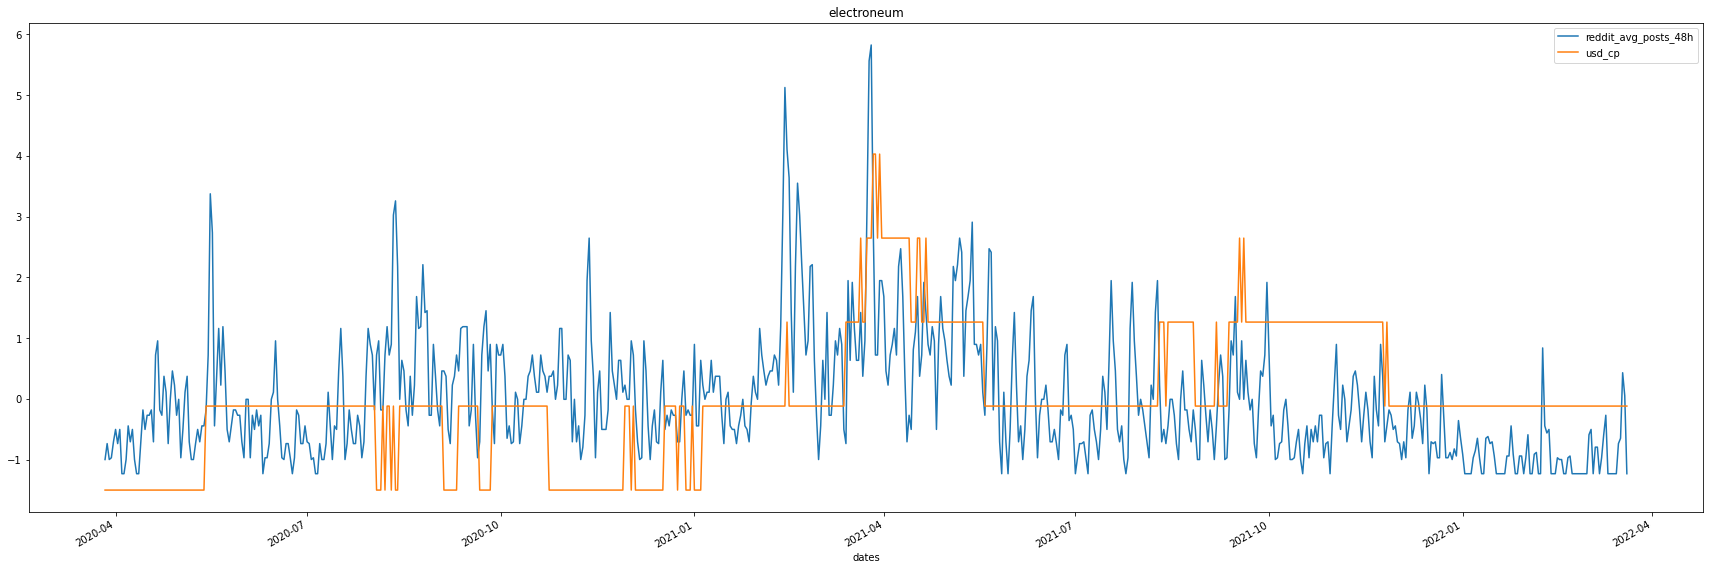

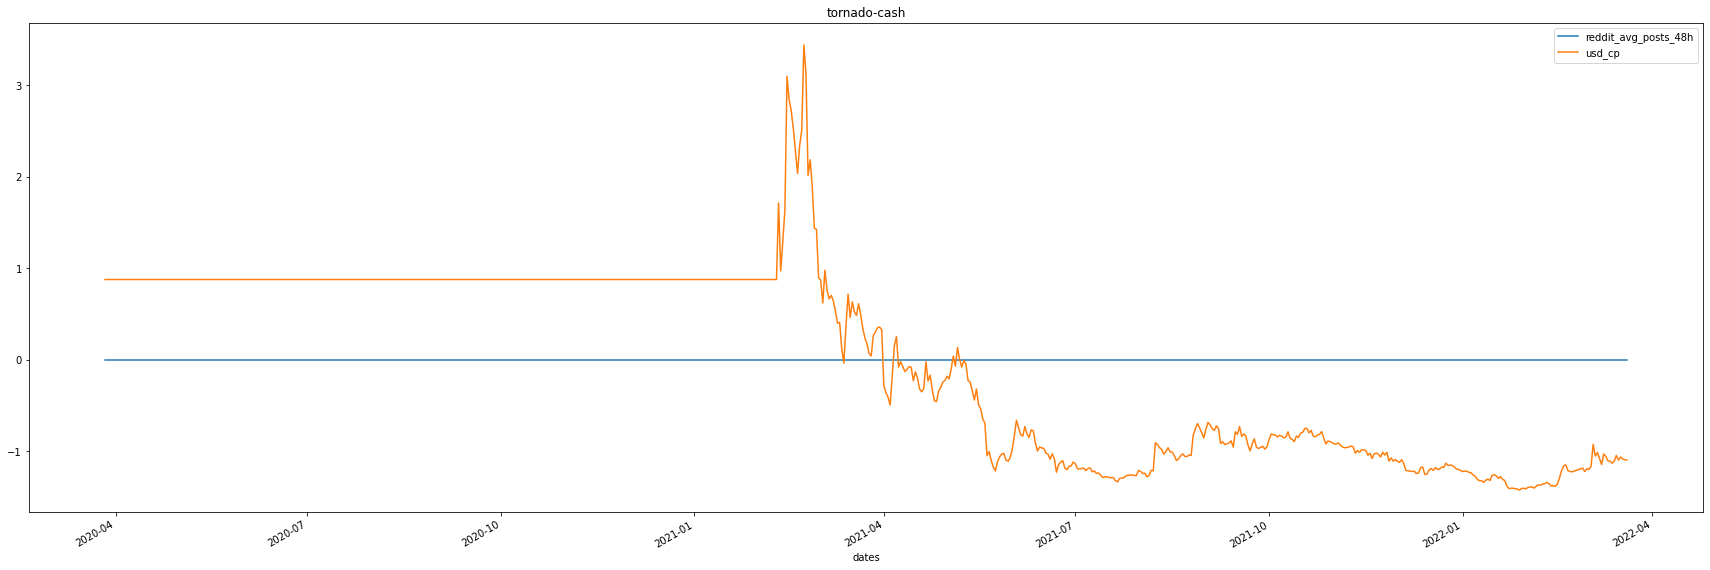

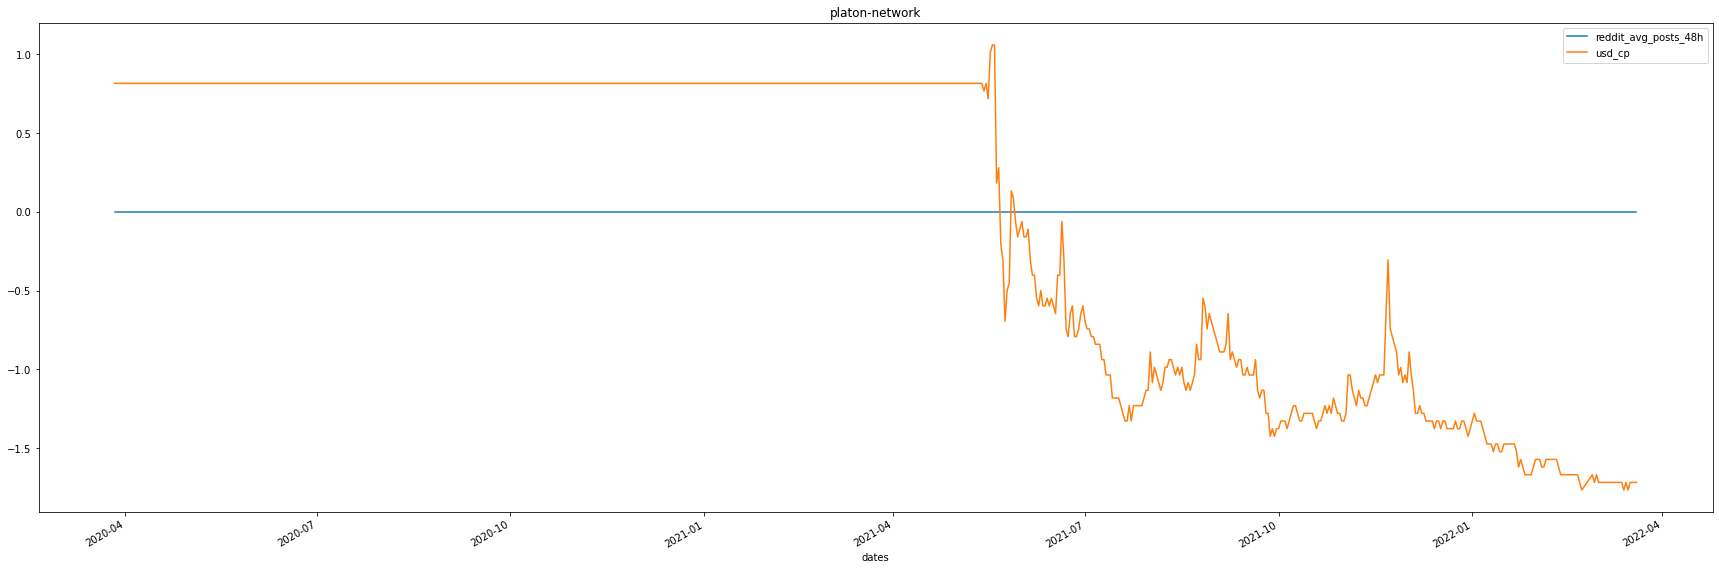

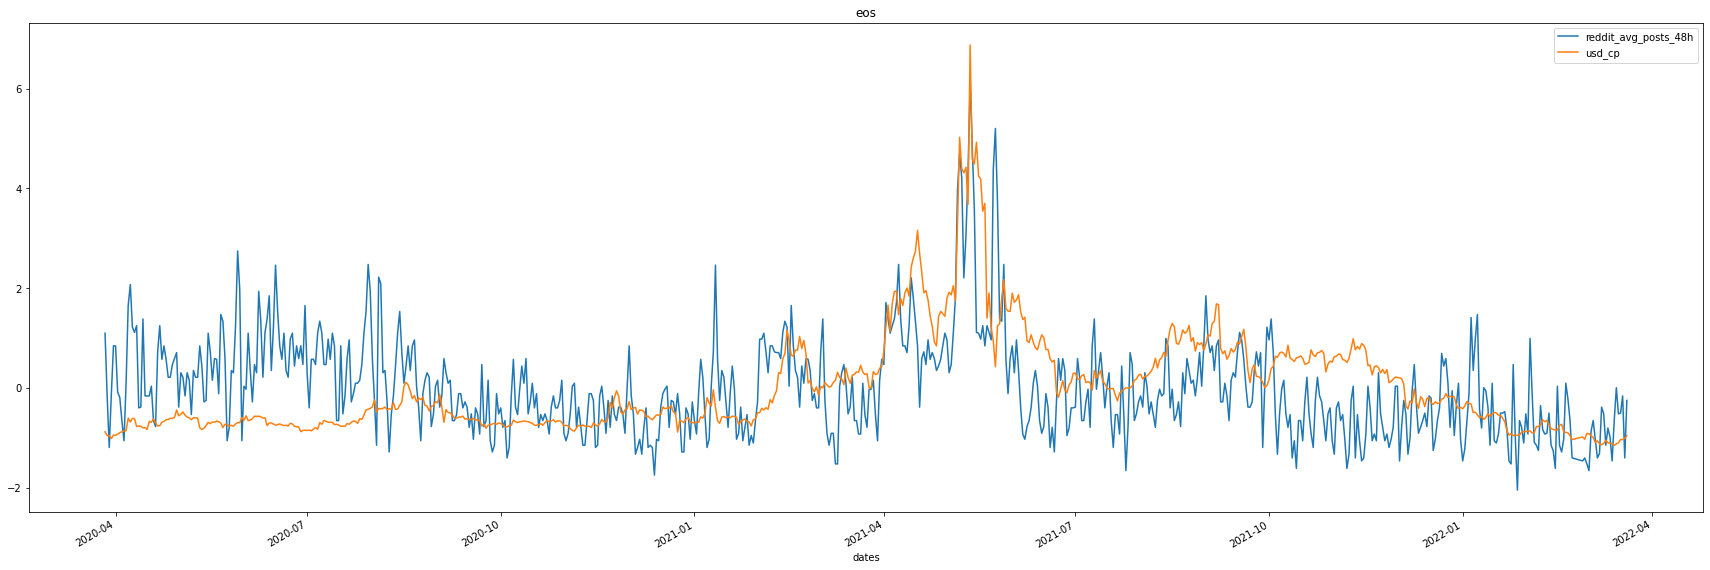

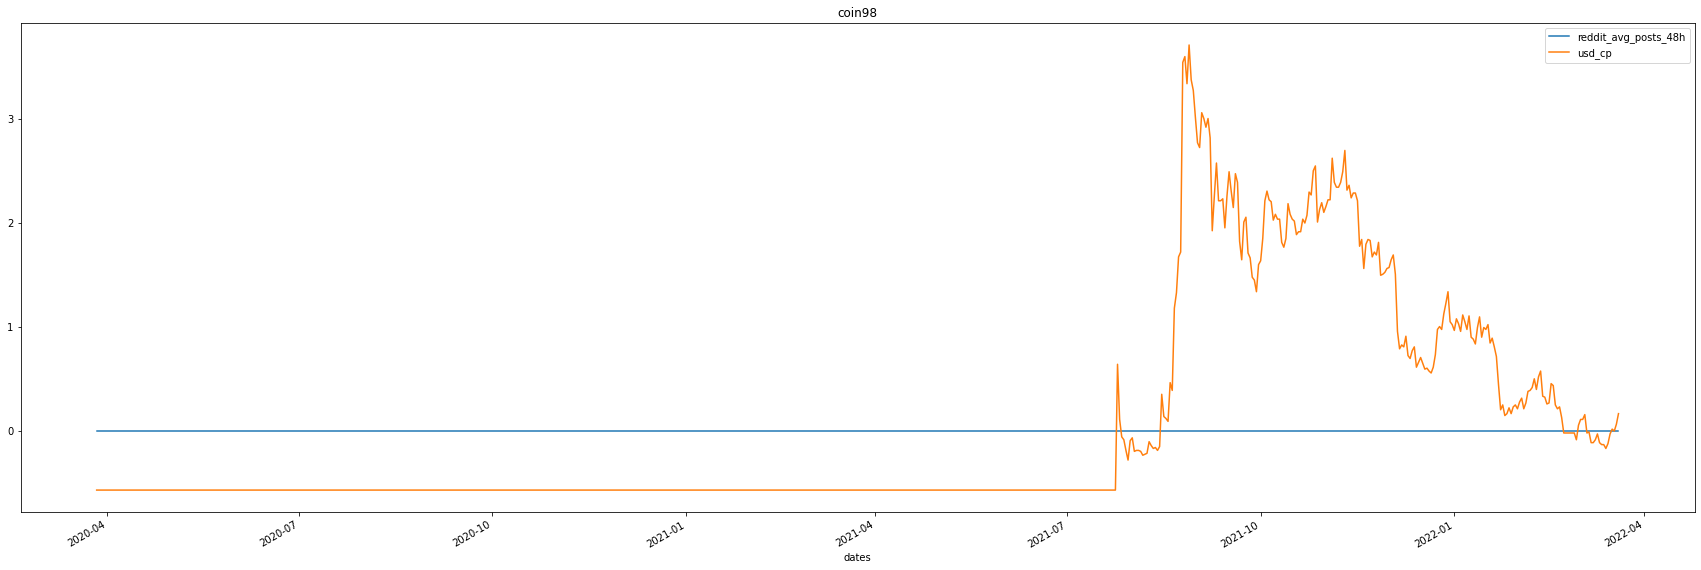

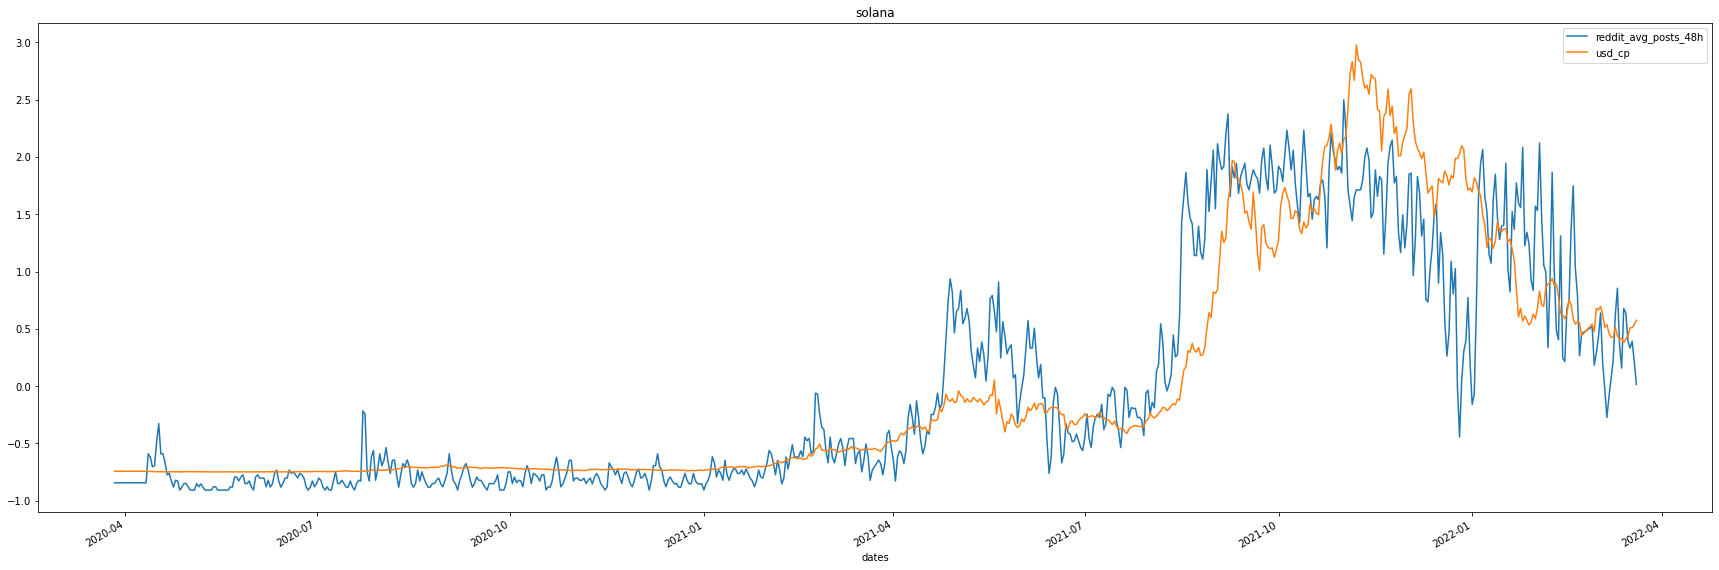

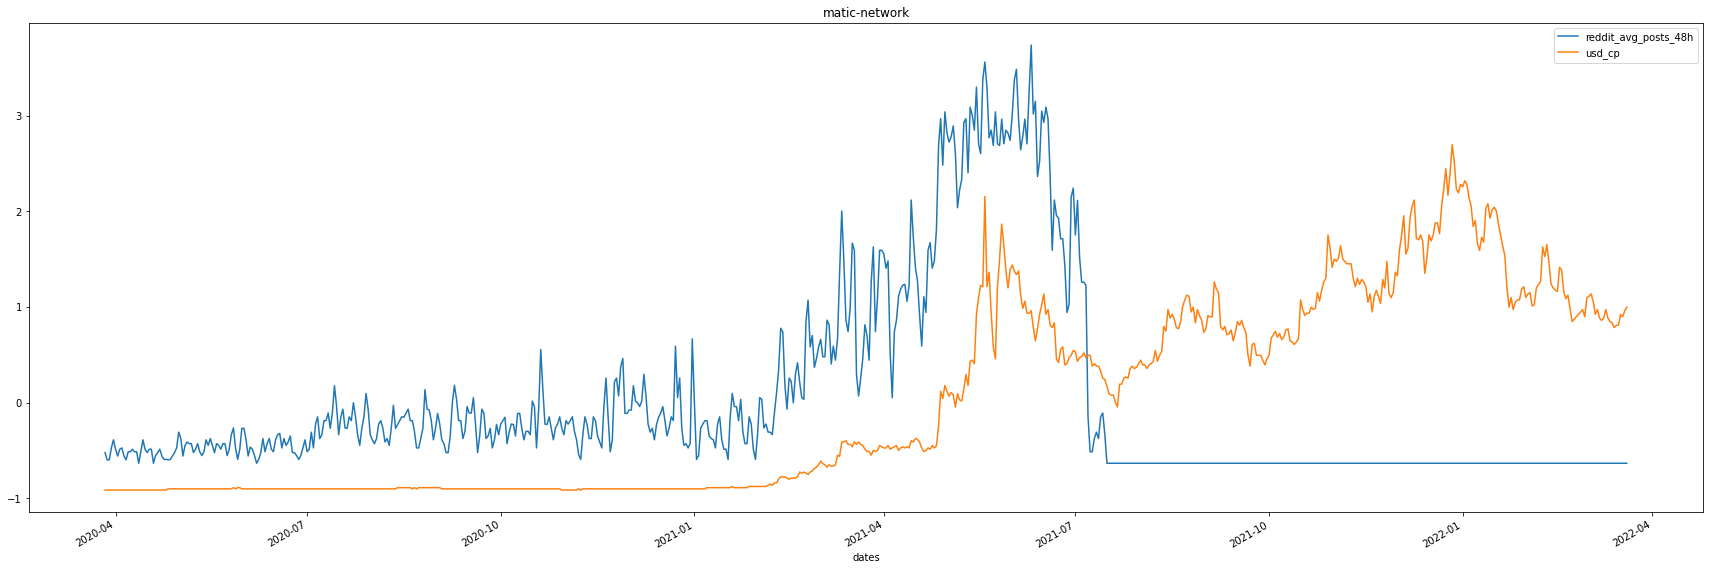

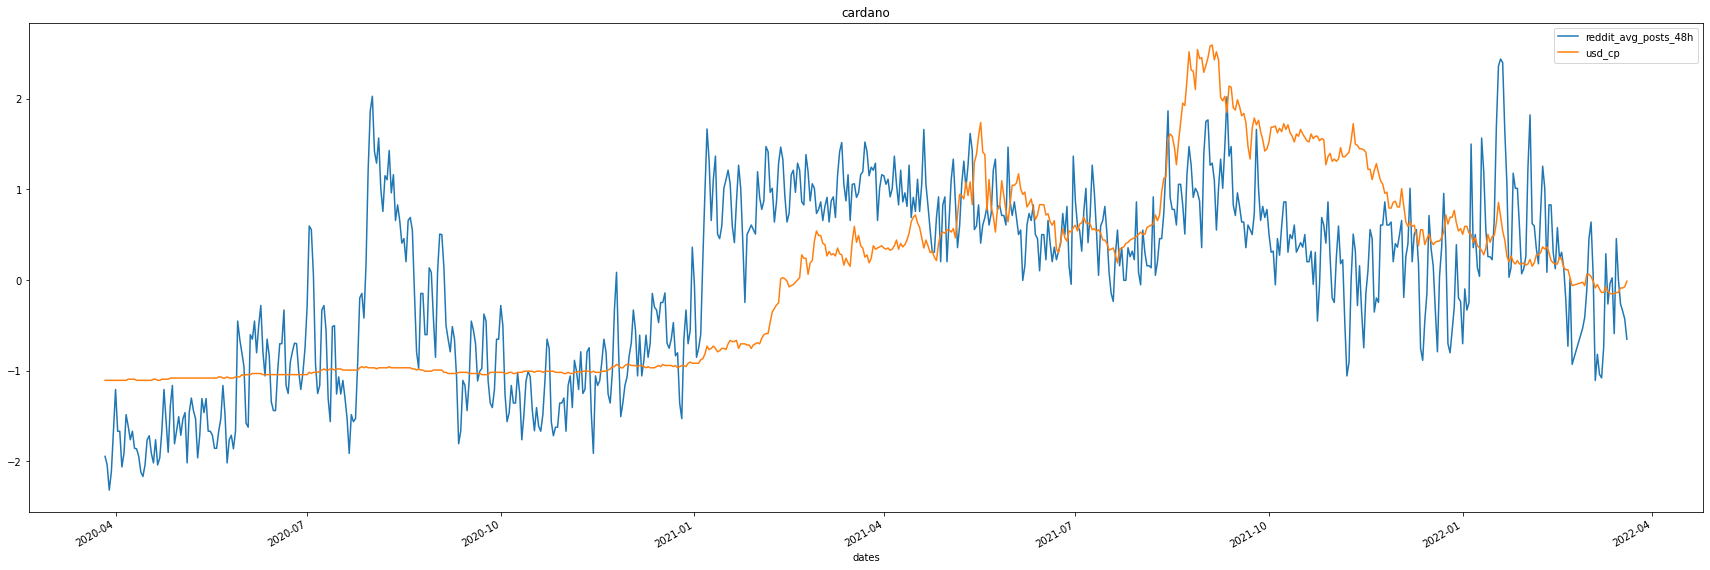

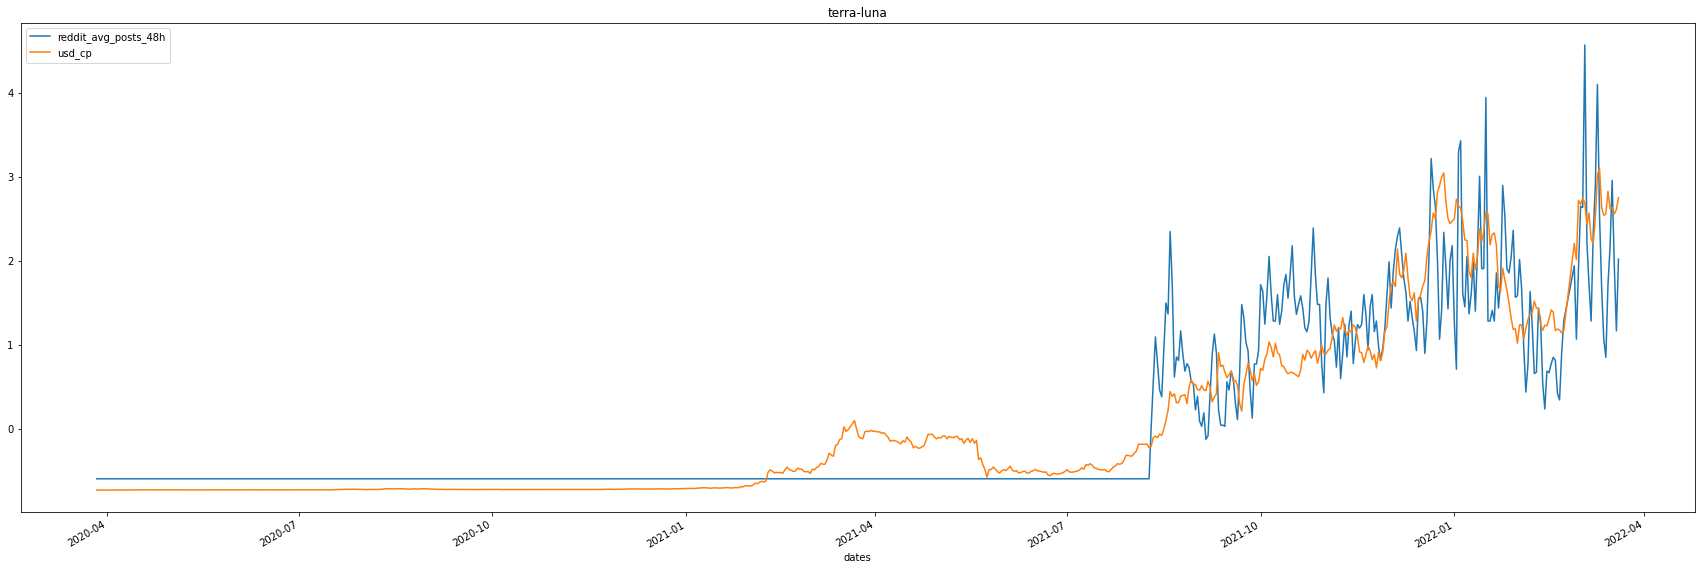

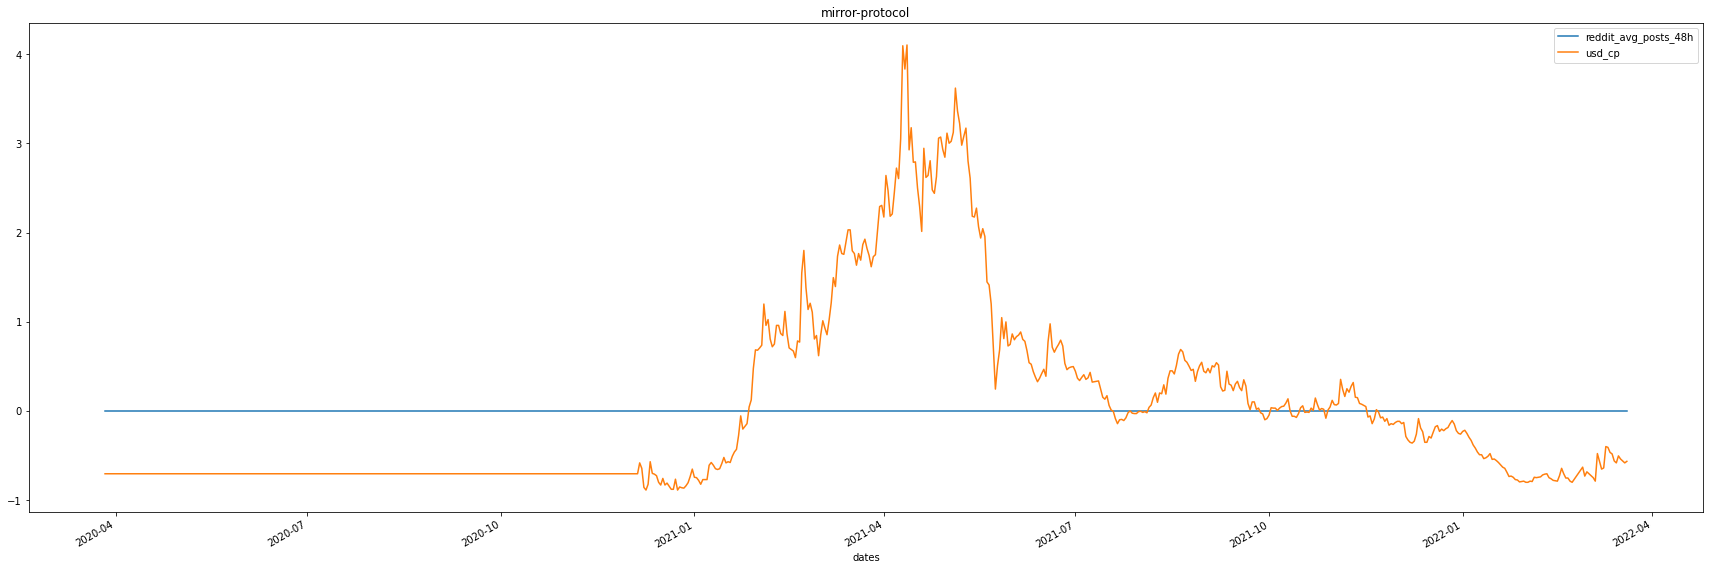

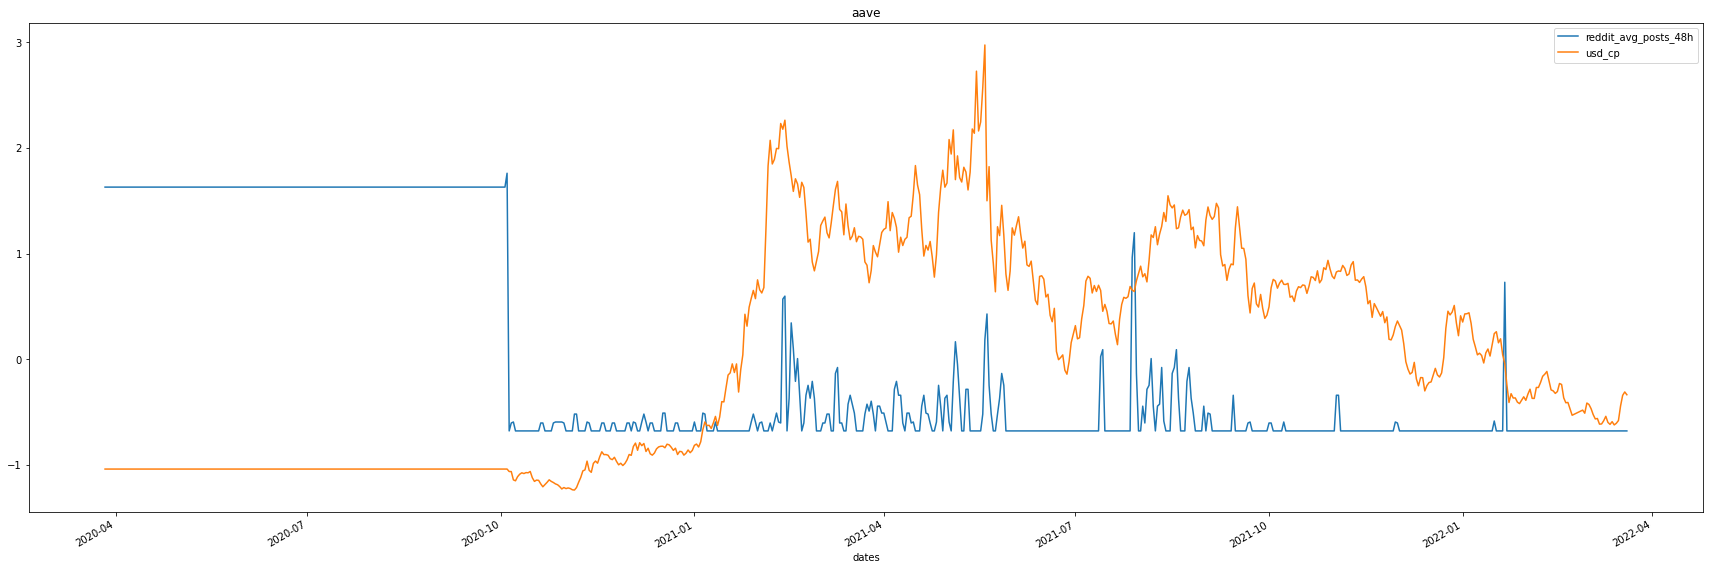

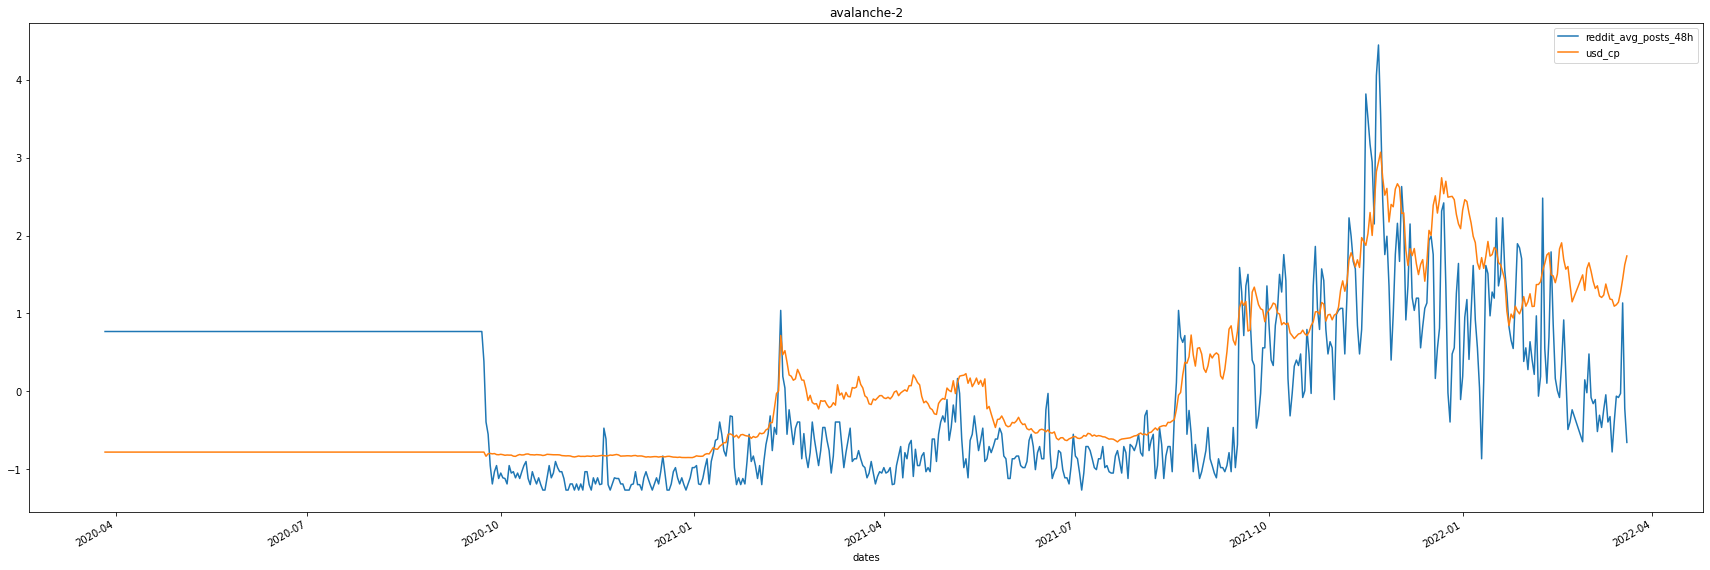

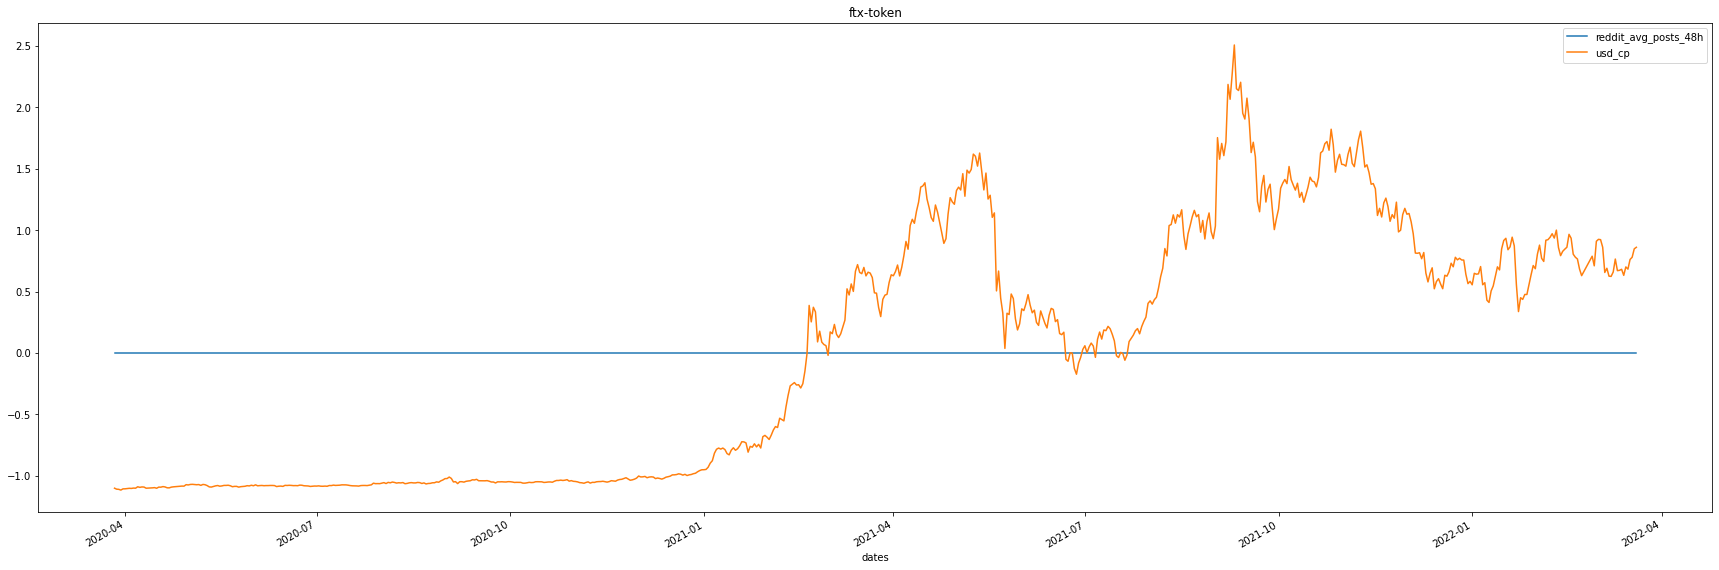

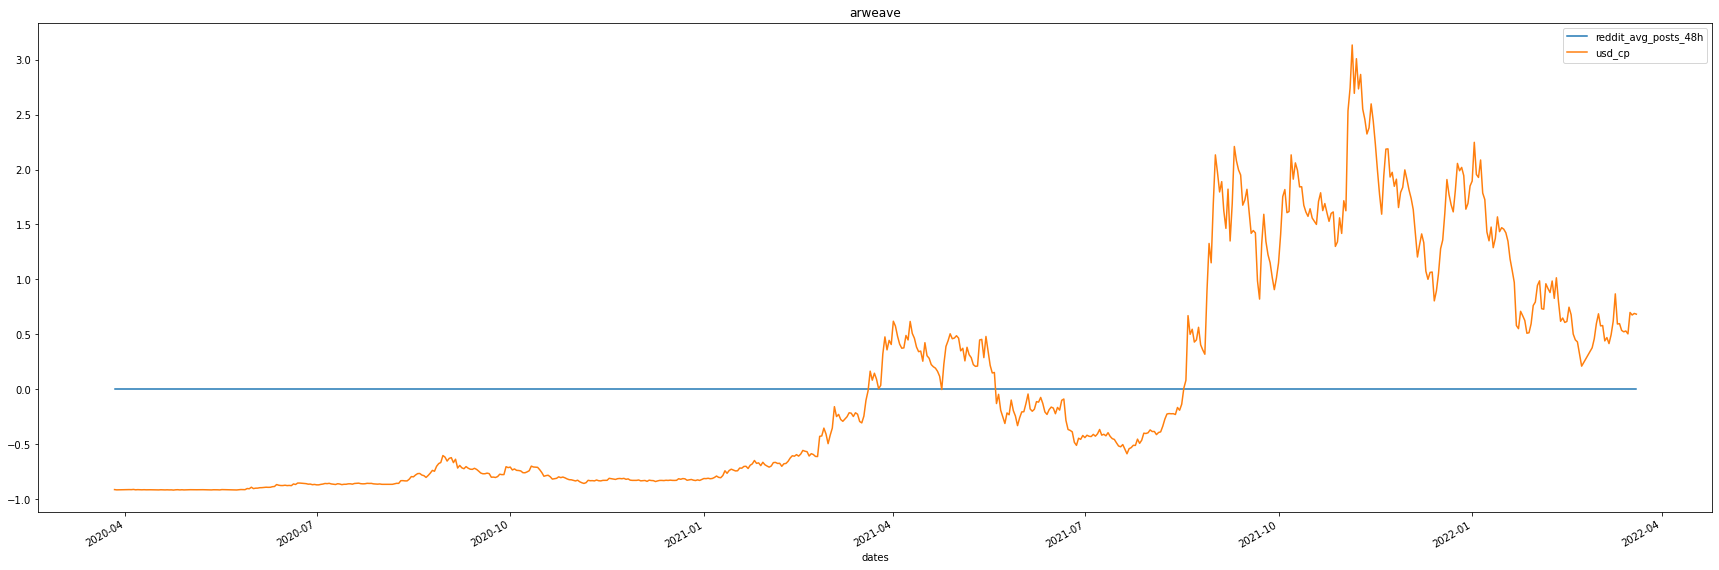

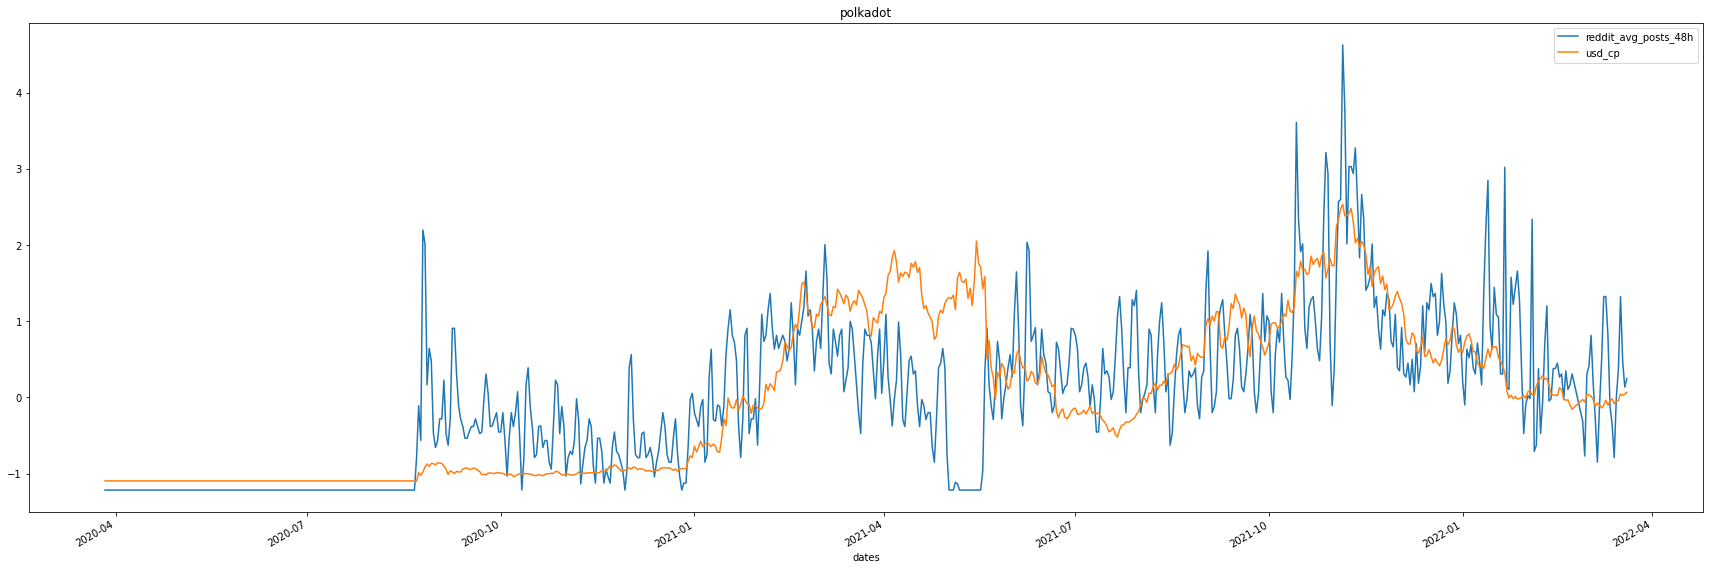

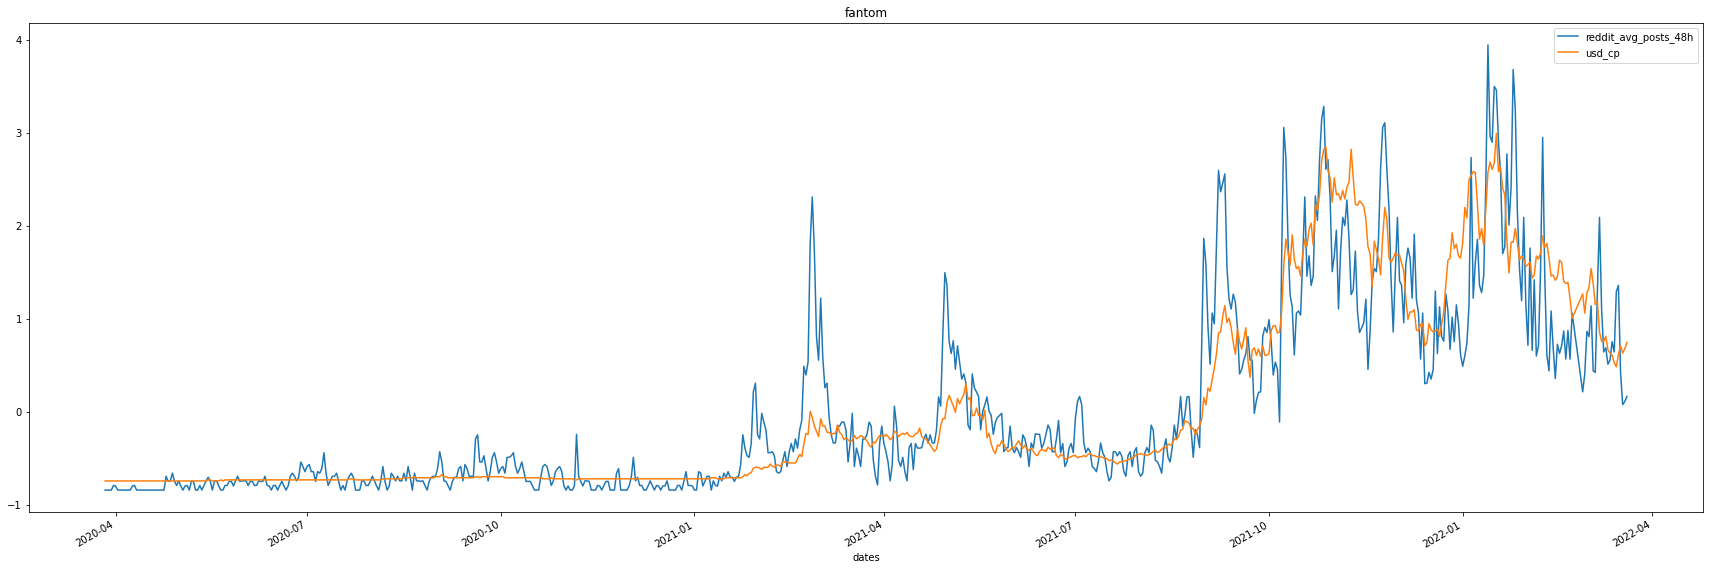

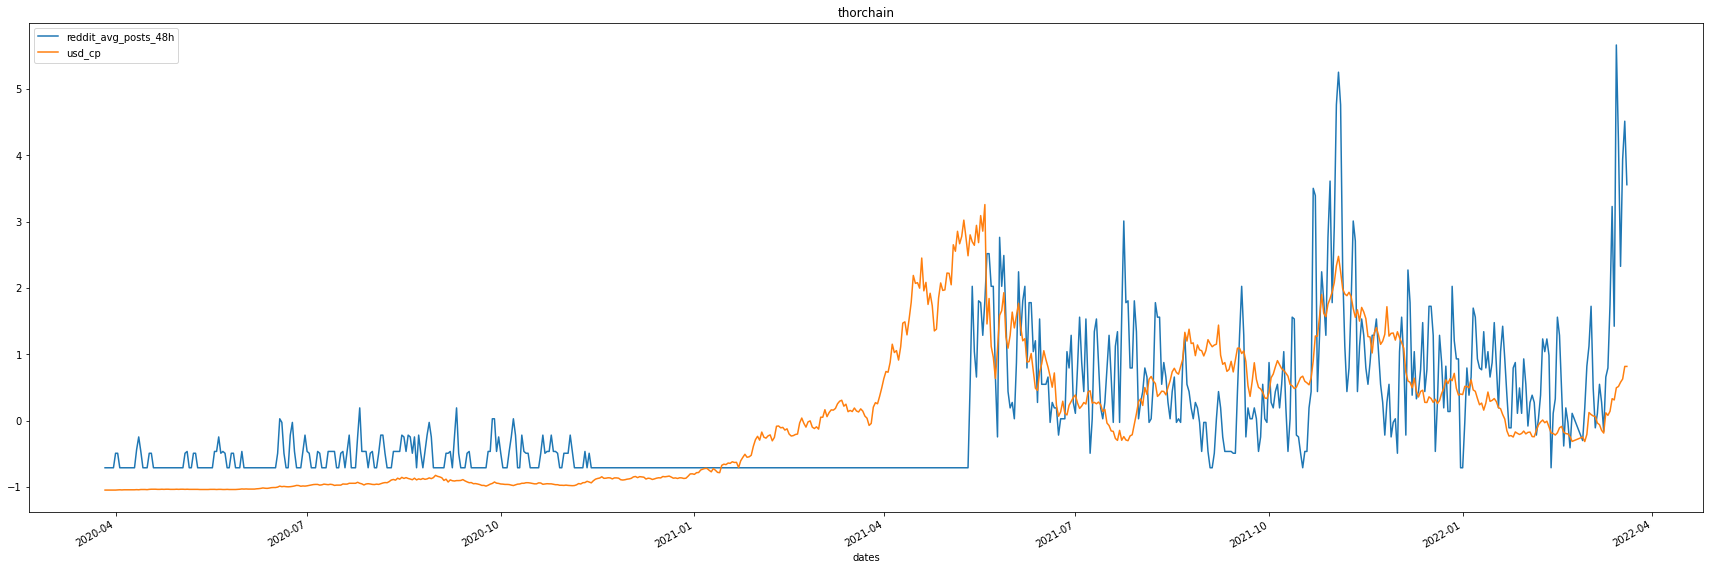

In [29]:
for id in main50.id:
    log_plot(id, 720)

## Vizualize growth for all features 
 * There are 2 points of consideration regarding our features
     * We are handling with features which have very different scales, such as trading_volume and social_activity. 
     * Some features, such as twitter_followers, tend to go upwards way more often then downwards. 
     * Considering both of them, one way to simplify comparissons is to actually compare their growth_rate. 

### Define function to extrate daily growth rate 

In [31]:
def growthRate(ts,col):
    df = pd.DataFrame()
    df[col]= ts[col]
    df['growth_rate | %'] = round((round(ts[col] / ts[col].shift(periods=-1),8)-1) *100,2)
    return df

In [ ]:
main50.sample(1)

### Visualize

In [ ]:
df = read_csv('neo')

for col in df.columns:
    fig, axes = plt.subplots(3,1, figsize=(20, 5))
    
    df[col].plot(figsize=(20,5), title = col, ax=axes[0])
    growthRate(df,col)['growth_rate | %'].plot(figsize=(20,5), title = 'Growth Rate | %', ax=axes[1])
    growthRate(df,'usd_cp')['growth_rate | %'].plot(figsize=(20,5), title = 'Price Growth Rate | %', ax=axes[2])

In [33]:
def a():
    pass

a = a()

In [35]:
type(a)

NoneType

In [38]:
my_set = {0,'apple',3.5}

In [40]:
type(my_set)

set

In [ ]:
my